# Initial staff cleaning

In [31]:
#  access the data 
import pandas as pd
dataStaff=pd.read_csv('J:\\SATS\\SATS_RAM.csv')


In [32]:
dataStaff=dataStaff[dataStaff['Orientation']=='Arrival']

In [33]:
dataStaff.shape

(10113, 9)

In [100]:
# remove .0 from ET column
dataStaff['ET']=dataStaff['ET'].astype(str).str[:-2]

In [101]:
dataStaff.tail()

,Flight Date,Orientation,Flight,ST,ET,RLO,RSM,EO,AA
20208,30-11-2022,Arrival,SQ 193,2315,2304,1.0,2,1,1.0
20209,30-11-2022,Arrival,TR 653,2315,2353,1.0,2,1,1.0
20210,30-11-2022,Arrival,SQ 713,2330,105,1.0,2,1,1.0
20212,30-11-2022,Arrival,TR 617,2340,2353,1.0,3,1,1.0
20218,30-11-2022,Arrival,SQ 897,2355,2338,1.0,1,1,1.0


In [102]:
# dataStaff['ET'] = '{:0>4}'.format(dataStaff['ET'])
# set ET to string
dataStaff['ET']=dataStaff['ET'].astype(str)
dataStaff['ET'] = dataStaff['ET'].apply(lambda x: '{:0>4}'.format(x))
dataStaff.tail()

,Flight Date,Orientation,Flight,ST,ET,RLO,RSM,EO,AA
20208,30-11-2022,Arrival,SQ 193,2315,2304,1.0,2,1,1.0
20209,30-11-2022,Arrival,TR 653,2315,2353,1.0,2,1,1.0
20210,30-11-2022,Arrival,SQ 713,2330,0105,1.0,2,1,1.0
20212,30-11-2022,Arrival,TR 617,2340,2353,1.0,3,1,1.0
20218,30-11-2022,Arrival,SQ 897,2355,2338,1.0,1,1,1.0


In [5]:
dataStaff.tail()

,Flight Date,Orientation,Flight,ST,ET,RLO,RSM,EO,AA
20208,30-11-2022,Arrival,SQ 193,2315,2304.0,1.0,2,1,1.0
20209,30-11-2022,Arrival,TR 653,2315,2353.0,1.0,2,1,1.0
20210,30-11-2022,Arrival,SQ 713,2330,105.0,1.0,2,1,1.0
20212,30-11-2022,Arrival,TR 617,2340,2353.0,1.0,3,1,1.0
20218,30-11-2022,Arrival,SQ 897,2355,2338.0,1.0,1,1,1.0


In [6]:
# any null values?
dataStaff['ET'].isnull().sum()

0

In [7]:
# insert : into ET
dataStaff['ET'] = dataStaff['ET'].str[:2] + ':' + dataStaff['ET'].str[2:]

In [8]:
dataStaff.tail()

,Flight Date,Orientation,Flight,ST,ET,RLO,RSM,EO,AA
20208,30-11-2022,Arrival,SQ 193,2315,23:04.0,1.0,2,1,1.0
20209,30-11-2022,Arrival,TR 653,2315,23:53.0,1.0,2,1,1.0
20210,30-11-2022,Arrival,SQ 713,2330,10:5.0,1.0,2,1,1.0
20212,30-11-2022,Arrival,TR 617,2340,23:53.0,1.0,3,1,1.0
20218,30-11-2022,Arrival,SQ 897,2355,23:38.0,1.0,1,1,1.0


In [9]:
# convert ET to datetime
# dataStaff['ET'] = pd.to_datetime(dataStaff['ET'])
dataStaff['ET'].shape

(10113,)

In [10]:
# import pandas as pd
# import re

# # dataStaff = pd.DataFrame({'ET': ['12:30','14:00','00:0n','16:00']})

# # check for invalid values using regular expressions
# invalid_mask = dataStaff['ET'].apply(lambda x: bool(re.search(r'^(?:(?:([01]?\d|2[0-3]):)?([0-5]?\d):[0-5]?[0-9]n$', x)))

# # check for invalid values
# print(dataStaff[invalid_mask])
# Convert columns to datetime data type with 'coerce' error handling
dataStaff['ET'] = pd.to_datetime(dataStaff['ET'], format='%H:%M', errors='coerce')

# check for NaT values
print(dataStaff[pd.isna(dataStaff['ET'])])


      Flight Date Orientation  Flight    ST  ET  RLO   RSM  EO   AA
2        1/9/2022     Arrival  SQ 208    15 NaT   1.0    4   1  2.0
4        1/9/2022     Arrival  SQ 242    20 NaT   1.0    3   1  1.0
11       1/9/2022     Arrival   SQ 11   115 NaT   1.0    3   1  2.0
22       1/9/2022     Arrival   TR 25   355 NaT   1.0    3   1  1.0
23       1/9/2022     Arrival  TR 509   405 NaT   1.0    3   1  2.0
...           ...         ...     ...   ...  ..   ...  ...  ..  ...
20208  30-11-2022     Arrival  SQ 193  2315 NaT   1.0    2   1  1.0
20209  30-11-2022     Arrival  TR 653  2315 NaT   1.0    2   1  1.0
20210  30-11-2022     Arrival  SQ 713  2330 NaT   1.0    2   1  1.0
20212  30-11-2022     Arrival  TR 617  2340 NaT   1.0    3   1  1.0
20218  30-11-2022     Arrival  SQ 897  2355 NaT   1.0    1   1  1.0

[10113 rows x 9 columns]


In [175]:
# delete all rows with NaT values in the 'ET' column
dataStaff = dataStaff.dropna(subset=['ET'])


In [160]:
# Convert columns to numeric data type with 'coerce' error handling
dataStaff['ET'] = pd.to_numeric(dataStaff['ET'], errors='coerce')

# check for NaN values
# print(dataStaff[pd.isna(dataStaff['ET'])])

In [161]:
print(dataStaff[pd.isna(dataStaff['ET'])])

      Flight Date Orientation  Flight    ST  ET  RLO   RSM  EO   AA
30       1/9/2022     Arrival  TR 713   520 NaN   0.0    0   0  0.0
461      3/9/2022     Arrival  TR 509   405 NaN   0.0    0   0  0.0
462      3/9/2022     Arrival  TR 713   410 NaN   0.0    0   0  0.0
1428     7/9/2022     Arrival  SQ 896  1532 NaN   0.0    0   0  0.0
1433     7/9/2022     Arrival  SQ 896  1551 NaN   0.0    0   0  0.0
1654     8/9/2022     Arrival  TR 809  1630 NaN   0.0    0   0  0.0
1884     9/9/2022     Arrival  SQ 333  1730 NaN   0.0    0   0  0.0
2047    10/9/2022     Arrival  SQ 192   933 NaN   0.0    0   0  0.0
2052    10/9/2022     Arrival  SQ 192   951 NaN   0.0    0   0  0.0
2321    11/9/2022     Arrival  SQ 939  1550 NaN   1.0    3   1  2.0
3136   15-09-2022     Arrival  SQ 334  1414 NaN   0.0    0   0  0.0
3794   18-09-2022     Arrival  SQ 326  1137 NaN   0.0    0   0  0.0
4644   22-09-2022     Arrival  SQ 912  1229 NaN   0.0    0   0  0.0
6318   30-09-2022     Arrival  TR 848   649 NaN 

In [143]:
# convert ET to datetime by adding : in the middle
# dataStaff['ET']=pd.to_datetime(dataStaff['ET'], format='%H%M').dt.strftime('%H:%M')
dataStaff['ET'] = pd.to_datetime(dataStaff['ET'].astype(str), format='%H%M', errors='coerce')

# check for NaT values
print(dataStaff[pd.isna(dataStaff['ET'])])

# pd.to_datetime(df['time'], format='%H%M').dt.strftime('%H:%M')
# dataStaff['ET']=pd.to_datetime(dataStaff['ET'], format='%H:%M').dt.strftime('%H:%M')

      Flight Date Orientation  Flight    ST  ET  RLO   RSM  EO   AA
30       1/9/2022     Arrival  TR 713   520 NaT   0.0    0   0  0.0
461      3/9/2022     Arrival  TR 509   405 NaT   0.0    0   0  0.0
462      3/9/2022     Arrival  TR 713   410 NaT   0.0    0   0  0.0
1428     7/9/2022     Arrival  SQ 896  1532 NaT   0.0    0   0  0.0
1433     7/9/2022     Arrival  SQ 896  1551 NaT   0.0    0   0  0.0
1654     8/9/2022     Arrival  TR 809  1630 NaT   0.0    0   0  0.0
1884     9/9/2022     Arrival  SQ 333  1730 NaT   0.0    0   0  0.0
2047    10/9/2022     Arrival  SQ 192   933 NaT   0.0    0   0  0.0
2052    10/9/2022     Arrival  SQ 192   951 NaT   0.0    0   0  0.0
2321    11/9/2022     Arrival  SQ 939  1550 NaT   1.0    3   1  2.0
3136   15-09-2022     Arrival  SQ 334  1414 NaT   0.0    0   0  0.0
3794   18-09-2022     Arrival  SQ 326  1137 NaT   0.0    0   0  0.0
4644   22-09-2022     Arrival  SQ 912  1229 NaT   0.0    0   0  0.0
6318   30-09-2022     Arrival  TR 848   649 NaT 

In [34]:
dataStaff.columns
# fill NAN with 0
dataStaff['AA'].fillna(0,inplace=True)
dataStaff['RLO '].fillna(0,inplace=True)
# data['RLO'].isnull.sum()

In [35]:
dataStaff['staff']=dataStaff['RSM']+dataStaff['EO']+dataStaff['AA']+dataStaff['RLO ']

In [36]:

dataStaff['staff'].isnull().sum()

0

In [37]:
# display data where staff is null
dataStaff[dataStaff['staff'].isnull()]

,Flight Date,Orientation,Flight,ST,ET,RLO,RSM,EO,AA,staff


In [15]:
dataStaff['ET']=dataStaff['ET'].astype('str')

In [16]:
# remove the decimal point from the ET column:
dataStaff['ET']=dataStaff['ET'].str.replace('.0','')

# dataStaff['ET']=dataStaff['ET'].str.strip('.')[0]

C:\Users\pc\AppData\Local\Temp\ipykernel_31376\806292004.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataStaff['ET']=dataStaff['ET'].str.replace('.0','')


In [17]:
dataStaff=dataStaff[dataStaff['Orientation']=='Arrival']

In [38]:
dataStaff.shape

(10113, 10)

In [18]:
dataStaff.shape

(10113, 10)

In [180]:
# dataStaff ET to hours:minutes
dataStaff['ET']=pd.to_datetime(dataStaff['ET'], format='%H:%M').dt.strftime('%H:%M')


In [19]:
dataStaff.tail()

,Flight Date,Orientation,Flight,ST,ET,RLO,RSM,EO,AA,staff
20208,30-11-2022,Arrival,SQ 193,2315,NaT,1.0,2,1,1.0,5.0
20209,30-11-2022,Arrival,TR 653,2315,NaT,1.0,2,1,1.0,5.0
20210,30-11-2022,Arrival,SQ 713,2330,NaT,1.0,2,1,1.0,5.0
20212,30-11-2022,Arrival,TR 617,2340,NaT,1.0,3,1,1.0,6.0
20218,30-11-2022,Arrival,SQ 897,2355,NaT,1.0,1,1,1.0,4.0


In [24]:
# save the data
data.to_excel('J:\\SATS\\CLEAN_SATS_RAM.xlsx')

In [20]:
#  group and count all the flights by staff
data.groupby('staff')['Flight'].count()

NameError: name 'data' is not defined

# Read clean STAT RAM 

In [70]:
import pandas as pd
dataStaff=pd.read_excel('J:\\SATS\\CLEAN_SATS_RAM.xlsx')

In [71]:
dataStaff.head()

,Unnamed: 0,Flight Date,Orientation,Flight,ST,ET,RLO,RSM,EO,AA,staff
0,0,2022-09-01,Departure,SQ 225,5,21.0,1,3,1,2,7
1,1,2022-09-01,Departure,SQ 608,10,11.0,1,3,0,2,6
2,2,2022-09-01,Arrival,SQ 208,15,21.0,1,4,1,2,8
3,3,2022-09-01,Departure,SQ 336,15,21.0,1,3,1,2,7
4,4,2022-09-01,Arrival,SQ 242,20,40.0,1,3,1,1,6


In [72]:
dataStaff.shape

(20219, 11)

In [44]:
#  remove where Flight No, Flight Date and In-bound Time all three are duplicated all together:
# data1.drop_duplicates(subset=['Flight No','Flight Date','In-bound Time'],keep='first',inplace=True)


In [73]:
dataStaff[dataStaff['Orientation']=='Arrival']

,Unnamed: 0,Flight Date,Orientation,Flight,ST,ET,RLO,RSM,EO,AA,staff
2,2,2022-09-01,Arrival,SQ 208,15,21.0,1,4,1,2,8
4,4,2022-09-01,Arrival,SQ 242,20,40.0,1,3,1,1,6
11,11,2022-09-01,Arrival,SQ 11,115,38.0,1,3,1,2,7
22,22,2022-09-01,Arrival,TR 25,355,355.0,1,3,1,1,6
23,23,2022-09-01,Arrival,TR 509,405,510.0,1,3,1,2,7
...,...,...,...,...,...,...,...,...,...,...,...
20208,20208,2022-11-30,Arrival,SQ 193,2315,2304.0,1,2,1,1,5
20209,20209,2022-11-30,Arrival,TR 653,2315,2353.0,1,2,1,1,5
20210,20210,2022-11-30,Arrival,SQ 713,2330,105.0,1,2,1,1,5
20212,20212,2022-11-30,Arrival,TR 617,2340,2353.0,1,3,1,1,6


In [74]:
# remove the space in between the flight number

dataStaff['Flight']=dataStaff['Flight'].str.strip()
dataStaff['Flight'] = dataStaff['Flight'].str.replace(' ', '')
dataStaff['Flight'].head()

0    SQ225
1    SQ608
2    SQ208
3    SQ336
4    SQ242
Name: Flight, dtype: object

In [75]:
dataStaff=dataStaff[dataStaff['Orientation']=='Arrival']
dataStaff.shape

(10113, 11)

In [76]:
# remove any rows where the Orientation is not Arrival
dataStaff=dataStaff[dataStaff['Orientation']=='Arrival']

In [77]:
dataStaff.shape

(10113, 11)

In [301]:
# set the date column as pandas date
# dataStaff['Flight Date']=pd.to_datetime(dataStaff['Flight Date'])
# arrivalFlights['Flight Date']=pd.to_datetime(arrivalFlights['Flight Date'])

C:\Users\pc\AppData\Local\Temp\ipykernel_28092\33504595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrivalFlights['Flight Date']=pd.to_datetime(arrivalFlights['Flight Date'])


In [52]:
# arrivalFlights['Flight Date'].head()

NameError: name 'arrivalFlights' is not defined

# Data Bugagge 

In [78]:
# dataBugagge['Flight Date']=pd.to_datetime(dataBugagge['Flight Date'])
import pandas as pd
dataBugagge=pd.read_excel('J:\\SATS\\Buggage.xlsx',sheet_name='in')

In [79]:
dataBugagge['Flight No'].iloc[2]

'\ufeffSQ208'

In [80]:
dataBugagge['Flight No'] = dataBugagge['Flight No'].str.replace('\ufeff','')


In [81]:
dataBugagge['Flight No'] = dataBugagge['Flight No'].str.lstrip()


In [82]:
dataBugagge['Flight Date'].head()

0   2022-09-01
1   2022-09-01
2   2022-09-01
3   2022-09-01
4   2022-09-01
Name: Flight Date, dtype: datetime64[ns]

In [83]:
# any Flight No with leading \ufeff?
dataBugagge['Flight No'].str.contains('\ufeff').sum()

0

In [84]:
dataBugagge.columns

Index(['Flight No', 'Flight Date', 'In-bound Time', 'Trip Number',
       'ULD Number', 'Pickup Time', 'Dropoff Time'],
      dtype='object')

In [85]:
# dataBugagge['Drop Off Time']=pd.to_datetime(dataBugagge['Drop Off Time'])
# set the Drop Off Time for each day the last one:

dataBugagge['Dropoff TimeN']=dataBugagge.groupby(['Flight Date','Flight No'])['Dropoff Time'].transform('last')


In [86]:
dataBugagge['Flight No'].iloc[2]

'SQ208'

In [87]:
dataBugagge['Dropoff Time'].isnull().sum()
# fill null values with 0 datetime
dataBugagge['Dropoff Time'].fillna(pd.to_datetime('00:00'),inplace=True)

In [88]:
dataBugagge.isnull().sum()

Flight No            0
Flight Date          1
In-bound Time       73
Trip Number          1
ULD Number           1
Pickup Time      46992
Dropoff Time         0
Dropoff TimeN    35778
dtype: int64

In [89]:
dataBugagge.head()

,Flight No,Flight Date,In-bound Time,Trip Number,ULD Number,Pickup Time,Dropoff Time,Dropoff TimeN
0,SQ208,2022-09-01,2022-09-01 00:21:00,1.0,AKE89138SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,2022-09-01 00:48:19.473
1,SQ208,2022-09-01,2022-09-01 00:21:00,1.0,AKE29231SQ,2022-09-01 00:33:15.217,2022-09-01 00:37:16.930,2022-09-01 00:48:19.473
2,SQ208,2022-09-01,2022-09-01 00:21:00,2.0,AKE28054SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933,2022-09-01 00:48:19.473
3,SQ208,2022-09-01,2022-09-01 00:21:00,2.0,AKE87419SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933,2022-09-01 00:48:19.473
4,SQ208,2022-09-01,2022-09-01 00:21:00,2.0,AKE80186SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933,2022-09-01 00:48:19.473


## Trip number against each flight


In [90]:
# count trips by flight number each day and save it to a new column:
dataBugagge['Total ULDS']=dataBugagge.groupby(['Flight Date','Flight No'])['Trip Number'].transform('count')
# dataBugagge.groupby(['Flight Date','Flight No'])['Trip Number'].count()

In [46]:
dataBugagge['Total ULDS']=dataBugagge.groupby(['Flight Date','Flight No'])['Trip Number'].transform('count')

In [91]:
dataBugagge.head()

,Flight No,Flight Date,In-bound Time,Trip Number,ULD Number,Pickup Time,Dropoff Time,Dropoff TimeN,Total ULDS
0,SQ208,2022-09-01,2022-09-01 00:21:00,1.0,AKE89138SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,2022-09-01 00:48:19.473,12.0
1,SQ208,2022-09-01,2022-09-01 00:21:00,1.0,AKE29231SQ,2022-09-01 00:33:15.217,2022-09-01 00:37:16.930,2022-09-01 00:48:19.473,12.0
2,SQ208,2022-09-01,2022-09-01 00:21:00,2.0,AKE28054SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933,2022-09-01 00:48:19.473,12.0
3,SQ208,2022-09-01,2022-09-01 00:21:00,2.0,AKE87419SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933,2022-09-01 00:48:19.473,12.0
4,SQ208,2022-09-01,2022-09-01 00:21:00,2.0,AKE80186SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933,2022-09-01 00:48:19.473,12.0


In [92]:
# dataBugagge
# drop the duplicate rows
dataBugagge.drop_duplicates(subset=['Flight Date','Flight No'],keep='first',inplace=True)

In [94]:
dataBugagge.head()

,Flight No,Flight Date,In-bound Time,Trip Number,ULD Number,Pickup Time,Dropoff Time,Dropoff TimeN,Total ULDS
0,SQ208,2022-09-01,2022-09-01 00:21:00,1.0,AKE89138SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,2022-09-01 00:48:19.473,12.0
12,SQ11,2022-09-01,2022-09-01 00:38:00,1.0,AKE70581SQ,NaT,2023-01-17 00:00:00.000,NaT,13.0
25,SQ242,2022-09-01,2022-09-01 00:40:00,1.0,AKE80436SQ,2022-09-01 00:54:23.003,2022-09-01 00:55:44.893,2022-09-01 00:55:44.900,4.0
29,TR25,2022-09-01,2022-09-01 03:55:00,1.0,AKE84300SQ,2022-09-01 04:17:01.517,2022-09-01 04:22:18.260,2022-09-01 04:38:25.783,11.0
40,TR541,2022-09-01,2022-09-01 04:04:00,1.0,BT804,NaT,2023-01-17 00:00:00.000,NaT,4.0


In [95]:
dataBugagge.drop_duplicates(subset=['Flight Date','Flight No'],keep='first',inplace=True)

In [96]:
# get Flight No at first index
dataBugagge['Flight No'].iloc[2]

# dataBugagge['Flight No']=='SQ208'

'SQ242'

In [33]:
# remove empty In-bound Time rows
dataBugagge=dataBugagge[dataBugagge['In-bound Time'].notnull()]

In [97]:
dataBugagge.columns

Index(['Flight No', 'Flight Date', 'In-bound Time', 'Trip Number',
       'ULD Number', 'Pickup Time', 'Dropoff Time', 'Dropoff TimeN',
       'Total ULDS'],
      dtype='object')

In [251]:
dataBugagge['In-bound Time'].isnull().sum()

0

In [240]:
# In-bound Time to string
dataBugagge['In-bound Time']=dataBugagge['In-bound Time'].astype(str)

In [45]:
dataBugagge['In-bound Time'].head()

0    2022-09-01 00:21:00
2    2022-09-01 00:21:00
12   2022-09-01 00:38:00
25   2022-09-01 00:40:00
29   2022-09-01 03:55:00
Name: In-bound Time, dtype: datetime64[ns]

In [242]:
# remove last three characters
dataBugagge['In-bound Time']=dataBugagge['In-bound Time'].str[:-3]

In [37]:
# trim Flight No
dataBugagge['Flight No']=dataBugagge['Flight No'].str.strip()

In [98]:
dataBugagge.head()


,Flight No,Flight Date,In-bound Time,Trip Number,ULD Number,Pickup Time,Dropoff Time,Dropoff TimeN,Total ULDS
0,SQ208,2022-09-01,2022-09-01 00:21:00,1.0,AKE89138SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,2022-09-01 00:48:19.473,12.0
12,SQ11,2022-09-01,2022-09-01 00:38:00,1.0,AKE70581SQ,NaT,2023-01-17 00:00:00.000,NaT,13.0
25,SQ242,2022-09-01,2022-09-01 00:40:00,1.0,AKE80436SQ,2022-09-01 00:54:23.003,2022-09-01 00:55:44.893,2022-09-01 00:55:44.900,4.0
29,TR25,2022-09-01,2022-09-01 03:55:00,1.0,AKE84300SQ,2022-09-01 04:17:01.517,2022-09-01 04:22:18.260,2022-09-01 04:38:25.783,11.0
40,TR541,2022-09-01,2022-09-01 04:04:00,1.0,BT804,NaT,2023-01-17 00:00:00.000,NaT,4.0


In [77]:
# save dataBugagge
dataBugagge.to_excel('J:\\SATS\\Count_BUGAGGE.xlsx')

In [252]:
# convrt to HH:MM
dataBugagge['In-bound Time']=pd.to_datetime(dataBugagge['In-bound Time'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%H:%M')

In [47]:
dataBugagge.tail()

,Flight No,Flight Date,In-bound Time,Trip Number,ULD Number,Pickup Time,Dropoff Time,Total Trips
73763,SQ105,2022-10-12,NaT,1.0,AKE84181SQ,2022-10-12 12:12:09.163,2022-10-12 12:13:25.653,5.0
73764,SQ224,2022-10-13,NaT,1.0,AKE86114SQ,2022-10-13 11:59:19.587,NaT,6.0
73767,TR391,2022-10-13,NaT,1.0,AKE11841TR,2022-10-13 23:37:47.297,2022-10-13 23:37:58.297,5.0
73768,SQ157,2022-10-13,NaT,1.0,BTBULK,NaT,NaT,5.0
73817,_x001A_,NaT,NaT,NaN,NaN,NaT,NaT,NaN


In [243]:
# remove first two characters
# dataBugagge['In-bound Time']=dataBugagge['In-bound Time'].str[11:]

In [304]:
dataBugagge['In-bound Time'].head()

0     00:21
2     00:21
12    00:38
25    00:40
29    03:55
Name: In-bound Time, dtype: object

In [245]:
# dataBugagge['In-bound Time'].tail()

73813    
73814    
73815    
73816    
73817    
Name: In-bound Time, dtype: object

In [215]:
# convert to HH:MM
# drop all null values
# dataBugagge.dropna(subset=['In-bound Time'],inplace=True)



# dataBugagge['In-bound Time']=pd.to_datetime(dataBugagge['In-bound Time'], format='%H:%M').dt.strftime('%H:%M')

In [216]:
# dataBugagge['In-bound Time']=pd.to_datetime(dataBugagge['In-bound Time'], format='%H:%M').dt.strftime('%H:%M')

ValueError: time data '' does not match format '%H:%M' (match)

In [197]:
# convrt to HH:MM
# dataBugagge['In-bound Time']=pd.to_datetime(dataBugagge['In-bound Time'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%H:%M')

In [194]:
# dataBugagge['In-bound Time']=dataBugagge['In-bound Time'].astype(str)

In [198]:
# dataBugagge['In-bound Time'].head()

0    00:21
1    00:21
2    00:21
3    00:21
4    00:21
Name: In-bound Time, dtype: object

In [76]:
# dataBugagge['In-bound Time']=dataBugagge['In-bound Time'].str.split(' ').str[1]

In [77]:
# dataBugagge['In-bound Time'].head()

0    00:21:00
1    00:21:00
2    00:21:00
3    00:21:00
4    00:21:00
Name: In-bound Time, dtype: object

In [78]:
# dataBugagge['In-bound Time']=dataBugagge['In-bound Time'][3:]
# remove first 3 characters
# dataBugagge['In-bound Time']=dataBugagge['In-bound Time'].str[3:]

In [305]:
dataBugagge.head()

,Flight No,Flight Date,In-bound Time,Trip Number,ULD Number,Pickup Time,Dropoff Time
0,SQ208,2022-09-01,00:21,1.0,AKE89138SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930
2,﻿SQ208,2022-09-01,00:21,2.0,AKE28054SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933
12,SQ11,2022-09-01,00:38,1.0,AKE70581SQ,NaT,NaT
25,SQ242,2022-09-01,00:40,1.0,AKE80436SQ,2022-09-01 00:54:23.003,2022-09-01 00:55:44.893
29,TR25,2022-09-01,03:55,1.0,AKE84300SQ,2022-09-01 04:17:01.517,2022-09-01 04:22:18.260


In [81]:
# dataBugagge['In-bound Time']=dataBugagge['In-bound Time'].str.replace(',',':')
# remove all the duplicates Flight No, Flight Date and In-bound Time all togather and keep the first one but Dropp-of-Time keep the last one:
dataBugagge.drop_duplicates(subset=['Flight No','Flight Date','In-bound Time'],keep='first',inplace=True)
dataBugagge.drop_duplicates(subset=['Flight No','Flight Date','In-bound Time'],keep='first',inplace=True)

# Handing drop of column

In [3]:
dataBugagge.columns

NameError: name 'dataBugagge' is not defined

In [82]:
dataBugagge.head

<bound method NDFrame.head of       Flight No Flight Date In-bound Time  Trip Number  ULD Number  \
0         SQ208  2022-09-01         21:00          1.0  AKE89138SQ   
2        ﻿SQ208  2022-09-01         21:00          2.0  AKE28054SQ   
12         SQ11  2022-09-01         38:00          1.0  AKE70581SQ   
25        SQ242  2022-09-01         40:00          1.0  AKE80436SQ   
29         TR25  2022-09-01         55:00          1.0  AKE84300SQ   
...         ...         ...           ...          ...         ...   
73763     SQ105  2022-10-12           NaN          1.0  AKE84181SQ   
73764     SQ224  2022-10-13           NaN          1.0  AKE86114SQ   
73767     TR391  2022-10-13           NaN          1.0  AKE11841TR   
73768     SQ157  2022-10-13           NaN          1.0      BTBULK   
73817   _x001A_         NaT           NaN          NaN         NaN   

                  Pickup Time            Dropoff Time  
0     2022-09-01 00:33:15.220 2022-09-01 00:37:16.930  
2     2022-09-01 

In [99]:
dataBugagge.shape

(8008, 9)

In [100]:
dataStaff.shape

(10113, 11)

In [22]:
dataBugagge.head()

,Flight No,Flight Date,In-bound Time,Trip Number,ULD Number,Pickup Time,Dropoff Time,Dropoff TimeN,Total ULDS
0,SQ208,2022-09-01,2022-09-01 00:21:00,1.0,AKE89138SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,2022-09-01 00:48:19.473,12.0
12,SQ11,2022-09-01,2022-09-01 00:38:00,1.0,AKE70581SQ,NaT,NaT,NaT,13.0
25,SQ242,2022-09-01,2022-09-01 00:40:00,1.0,AKE80436SQ,2022-09-01 00:54:23.003,2022-09-01 00:55:44.893,2022-09-01 00:55:44.900,4.0
29,TR25,2022-09-01,2022-09-01 03:55:00,1.0,AKE84300SQ,2022-09-01 04:17:01.517,2022-09-01 04:22:18.260,2022-09-01 04:38:25.783,11.0
40,TR541,2022-09-01,2022-09-01 04:04:00,1.0,BT804,NaT,NaT,NaT,4.0


In [101]:
dataBugagge.dtypes

Flight No                object
Flight Date      datetime64[ns]
In-bound Time    datetime64[ns]
Trip Number             float64
ULD Number               object
Pickup Time      datetime64[ns]
Dropoff Time     datetime64[ns]
Dropoff TimeN    datetime64[ns]
Total ULDS              float64
dtype: object

In [308]:
dataStaff['ET'] = pd.to_datetime(dataStaff['ET'], format='%H:%M', errors='coerce')

# check for NaT values
print(dataStaff[pd.isna(dataStaff['ET'])])

       Unnamed: 0 Flight Date Orientation Flight    ST  ET  RLO   RSM  EO  AA  \
0               0  2022-09-01   Departure  SQ225     5 NaT     1    3   1   2   
1               1  2022-09-01   Departure  SQ608    10 NaT     1    3   0   2   
2               2  2022-09-01     Arrival  SQ208    15 NaT     1    4   1   2   
3               3  2022-09-01   Departure  SQ336    15 NaT     1    3   1   2   
4               4  2022-09-01     Arrival  SQ242    20 NaT     1    3   1   1   
...           ...         ...         ...    ...   ...  ..   ...  ...  ..  ..   
20214       20214  2022-11-30   Departure  SQ378  2345 NaT     1    3   1   2   
20215       20215  2022-11-30   Departure   SQ26  2355 NaT     1    3   1   2   
20216       20216  2022-11-30   Departure  SQ324  2355 NaT     1    2   1   1   
20217       20217  2022-11-30   Departure  SQ638  2355 NaT     1    3   1   1   
20218       20218  2022-11-30     Arrival  SQ897  2355 NaT     1    1   1   1   

       staff  
0          7

In [311]:
dataStaff['ET']=pd.to_datetime(dataStaff['ET'], format='%H:%M').dt.strftime('%H:%M')

In [102]:
dataStaff.dtypes

Unnamed: 0              int64
Flight Date    datetime64[ns]
Orientation            object
Flight                 object
ST                      int64
ET                    float64
RLO                     int64
RSM                     int64
EO                      int64
AA                      int64
staff                   int64
dtype: object

In [313]:
# datastagg Flight Date to pandas date YYYY-MM-DD:

dataStaff['Flight Date']=pd.to_datetime(dataStaff['Flight Date'], format='%Y-%m-%d', errors='coerce')

In [314]:
dataStaff.tail()

,Unnamed: 0,Flight Date,Orientation,Flight,ST,ET,RLO,RSM,EO,AA,staff
20214,20214,2022-11-30,Departure,SQ378,2345,NaN,1,3,1,2,7
20215,20215,2022-11-30,Departure,SQ26,2355,NaN,1,3,1,2,7
20216,20216,2022-11-30,Departure,SQ324,2355,NaN,1,2,1,1,5
20217,20217,2022-11-30,Departure,SQ638,2355,NaN,1,3,1,1,6
20218,20218,2022-11-30,Arrival,SQ897,2355,NaN,1,1,1,1,4


In [54]:
dataStaff.dtypes

Unnamed: 0              int64
Flight Date    datetime64[ns]
Orientation            object
Flight                 object
ST                      int64
ET                    float64
RLO                     int64
RSM                     int64
EO                      int64
AA                      int64
staff                   int64
dtype: object

In [315]:
dataBugagge.tail()

,Flight No,Flight Date,In-bound Time,Trip Number,ULD Number,Pickup Time,Dropoff Time
73726,TR493,2022-11-30,23:14,1.0,BT2163,NaT,NaT
73729,SQ185,2022-11-30,23:19,0.0,AKE28070SQ,NaT,2022-11-30 23:54:44.753
73734,SQ906,2022-11-30,23:27,1.0,BT1483,NaT,NaT
73737,TR617,2022-11-30,23:53,1.0,AKE83265SQ,2022-12-01 00:10:20.050,NaT
73739,SQ739,2022-11-30,00:11,1.0,BT1218,NaT,NaT


In [114]:
dataBugagge.dtypes

Flight No                object
Flight Date      datetime64[ns]
In-bound Time    datetime64[ns]
Trip Number             float64
ULD Number               object
Pickup Time      datetime64[ns]
Dropoff Time     datetime64[ns]
dtype: object

In [317]:
dataBugagge['Flight Date']=pd.to_datetime(dataBugagge['Flight Date'], format='%Y-%m-%d', errors='coerce')

In [233]:
# ET datatype to HH:MM
dataStaff['ET']=pd.to_datetime(dataStaff['ET'], format='%H:%M').dt.strftime('%H:%M')
# dataBugagge In-bound Time is not null
dataBugagge=dataBugagge.dropna(subset=['In-bound Time'],inplace=True)
# dataBugagge[dataBugagge['In-bound Time']==]
# dataBugagge['In-bound Time']=pd.to_datetime(dataBugagge['In-bound Time'], format='%H:%M').dt.strftime('%H:%M')


TypeError: 'NoneType' object is not subscriptable

In [258]:
dataBugagge.dtypes

Flight No                object
Flight Date      datetime64[ns]
In-bound Time            object
Trip Number             float64
ULD Number               object
Pickup Time      datetime64[ns]
Dropoff Time     datetime64[ns]
dtype: object

In [103]:
dataStaff.dtypes

Unnamed: 0              int64
Flight Date    datetime64[ns]
Orientation            object
Flight                 object
ST                      int64
ET                    float64
RLO                     int64
RSM                     int64
EO                      int64
AA                      int64
staff                   int64
dtype: object

In [56]:
dataStaff.head()

,Unnamed: 0,Flight Date,Orientation,Flight,ST,ET,RLO,RSM,EO,AA,staff
2,2,2022-09-01,Arrival,SQ208,15,21.0,1,4,1,2,8
4,4,2022-09-01,Arrival,SQ242,20,40.0,1,3,1,1,6
11,11,2022-09-01,Arrival,SQ11,115,38.0,1,3,1,2,7
22,22,2022-09-01,Arrival,TR25,355,355.0,1,3,1,1,6
23,23,2022-09-01,Arrival,TR509,405,510.0,1,3,1,2,7


In [83]:
# remove all the duplicates Flight, Flight Date:
dataStaff.drop_duplicates(subset=['Flight','Flight Date'],keep='first',inplace=True)

In [84]:
dataStaff.shape

(10108, 11)

In [60]:
# remove all the duplicates Flight No, Flight Date:
dataBugagge.drop_duplicates(subset=['Flight No','Flight Date'],keep='first',inplace=True)

In [61]:
dataBugagge.shape

(8008, 9)

In [62]:
dataStaff.shape

(10113, 10)

In [ ]:
# change Flight no to Flight

In [63]:
dataStaff.drop_duplicates(subset=['Flight','Flight Date'],keep='first',inplace=True)

In [104]:
# merge dataStaff and dataBugagge on Flight, Flight Date, In-bound Time
# rename Flight to Flight No, ET to In-bound Time
dataStaff.rename(columns={'Flight':'Flight No'},inplace=True)
# dataStaffBugagge=pd.merge(dataStaff,dataBugagge,how='inner',on=['Flight','Flight Date','In-bound Time'])

In [105]:
dataBugagge['Flight Date']

0       2022-09-01
12      2022-09-01
25      2022-09-01
29      2022-09-01
40      2022-09-01
           ...    
73763   2022-10-12
73764   2022-10-13
73767   2022-10-13
73768   2022-10-13
73817          NaT
Name: Flight Date, Length: 8008, dtype: datetime64[ns]

In [65]:
dataStaff.shape

(10108, 10)

In [68]:
# convert to datetime
dataStaff['Flight Date']=pd.to_datetime(dataStaff['Flight Date'], format='%Y-%m-%d', errors='coerce')
# dataStaff['Flight Date'].

In [69]:
dataStaff['Flight Date'].head()

2    NaT
4    NaT
11   NaT
22   NaT
23   NaT
Name: Flight Date, dtype: datetime64[ns]

In [64]:
# intersect dataStaff and dataBugagge on Flight No on 2022-09-01:
dataBugagge['Flight No'].isin(dataStaff['Flight No']).loc[dataBugagge['Flight Date']=='2022-09-01'].sum()


68

In [106]:
dataStaffBugagge=pd.merge(dataStaff,dataBugagge,how='outer',on=['Flight No','Flight Date'])

In [107]:
dataStaffBugagge.head()

,Unnamed: 0,Flight Date,Orientation,Flight No,ST,ET,RLO,RSM,EO,AA,staff,In-bound Time,Trip Number,ULD Number,Pickup Time,Dropoff Time,Dropoff TimeN,Total ULDS
0,2.0,2022-09-01,Arrival,SQ208,15.0,21.0,1.0,4.0,1.0,2.0,8.0,2022-09-01 00:21:00,1.0,AKE89138SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,2022-09-01 00:48:19.473,12.0
1,4.0,2022-09-01,Arrival,SQ242,20.0,40.0,1.0,3.0,1.0,1.0,6.0,2022-09-01 00:40:00,1.0,AKE80436SQ,2022-09-01 00:54:23.003,2022-09-01 00:55:44.893,2022-09-01 00:55:44.900,4.0
2,11.0,2022-09-01,Arrival,SQ11,115.0,38.0,1.0,3.0,1.0,2.0,7.0,2022-09-01 00:38:00,1.0,AKE70581SQ,NaT,2023-01-17 00:00:00.000,NaT,13.0
3,22.0,2022-09-01,Arrival,TR25,355.0,355.0,1.0,3.0,1.0,1.0,6.0,2022-09-01 03:55:00,1.0,AKE84300SQ,2022-09-01 04:17:01.517,2022-09-01 04:22:18.260,2022-09-01 04:38:25.783,11.0
4,23.0,2022-09-01,Arrival,TR509,405.0,510.0,1.0,3.0,1.0,2.0,7.0,NaT,NaN,NaN,NaT,NaT,NaT,NaN


In [26]:
dataStaffBugagge.drop(columns=['Unnamed: 0','Trip Number','Dropoff Time'],inplace=True)

In [27]:
dataStaffBugagge.head()

,Flight Date,Orientation,Flight No,ST,ET,RLO,RSM,EO,AA,staff,In-bound Time,ULD Number,Pickup Time,Dropoff TimeN,Total ULDS
0,2022-09-01,Arrival,SQ208,15.0,21.0,1.0,4.0,1.0,2.0,8.0,2022-09-01 00:21:00,AKE89138SQ,2022-09-01 00:33:15.220,2022-09-01 00:48:19.473,12.0
1,2022-09-01,Arrival,SQ242,20.0,40.0,1.0,3.0,1.0,1.0,6.0,2022-09-01 00:40:00,AKE80436SQ,2022-09-01 00:54:23.003,2022-09-01 00:55:44.900,4.0
2,2022-09-01,Arrival,SQ11,115.0,38.0,1.0,3.0,1.0,2.0,7.0,2022-09-01 00:38:00,AKE70581SQ,NaT,NaT,13.0
3,2022-09-01,Arrival,TR25,355.0,355.0,1.0,3.0,1.0,1.0,6.0,2022-09-01 03:55:00,AKE84300SQ,2022-09-01 04:17:01.517,2022-09-01 04:38:25.783,11.0
4,2022-09-01,Arrival,TR509,405.0,510.0,1.0,3.0,1.0,2.0,7.0,NaT,NaN,NaT,NaT,NaN


In [108]:
dataStaffBugagge.shape

(11813, 18)

In [78]:
# save to csv
dataStaffBugagge.to_csv('J:\\SATS\\dataStaffBugagge3.csv',index=False)

In [97]:
dataStaffBugagge.shape

(11808, 15)

In [98]:
# drop all the Orientation where Flight not 'Arrival'
dataStaffBugagge.drop(dataStaffBugagge[dataStaffBugagge['Orientation']!='Arrival'].index,inplace=True)

In [99]:
dataStaffBugagge.shape

(10108, 15)

In [109]:
dataStaff.shape

(10113, 11)

In [110]:
# drop all the Orientation where Flight not 'Arrival'
dataStaff.drop(dataStaff[dataStaff['Orientation']!='Arrival'].index,inplace=True)

In [111]:
dataStaff.shape

(10113, 11)

In [112]:
dataStaffBugagge.drop(dataStaffBugagge[dataStaffBugagge['Orientation']!='Arrival'].index,inplace=True)

In [116]:
# save sataff to csv
dataStaff.to_csv('J:\\SATS\\dataStaff.csv',index=False)

In [114]:
dataStaffBugagge.shape

(10113, 18)

In [115]:
# save dataStaffBugagge to csv
dataStaffBugagge.to_csv('J:\\SATS\\dataStaffBugaggeNew.csv',index=False)

In [118]:
# why shape is different for dataSaff and dataStaffBugagge
# date wise flights in dataStaff
dataStaff.groupby('Flight Date')['Flight'].count()


Flight Date
2022-09-01    106
2022-09-02    109
2022-09-03    115
2022-09-04    115
2022-09-05    103
             ... 
2022-11-26    121
2022-11-27    122
2022-11-28    118
2022-11-29    113
2022-11-30    117
Name: Flight, Length: 91, dtype: int64

In [ ]:
# date wise flights in dataStaffBugagge
dataStaffBugagge.groupby('Flight Date')['Flight No'].count()


In [114]:
# find the difference between dataStaff and dataStaffBugagge on Flight No

dataStaff[~dataStaff['Flight'].isin(dataStaffBugagge['Flight No'])]

,Unnamed: 0,Flight Date,Orientation,Flight,ST,ET,RLO,RSM,EO,AA,staff


In [179]:
# save dataStaffBugagge to csv
dataStaffBugagge.to_csv('J:\\SATS\\dataStaffBugaggeNew.csv',index=False)

NameError: name 'dataStaffBugagge' is not defined

In [178]:
dataStaffBugagge.to_eaxel('J:\\SATS\\dataStaffBugaggeNew.xlsx',index=False)

NameError: name 'dataStaffBugagge' is not defined

In [119]:
dataStaffBugagge.head()

,Unnamed: 0,Flight Date,Orientation,Flight No,ST,ET,RLO,RSM,EO,AA,staff,In-bound Time,Trip Number,ULD Number,Pickup Time,Dropoff Time,Dropoff TimeN,Total ULDS
0,2.0,2022-09-01,Arrival,SQ208,15.0,21.0,1.0,4.0,1.0,2.0,8.0,2022-09-01 00:21:00,1.0,AKE89138SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,2022-09-01 00:48:19.473,12.0
1,4.0,2022-09-01,Arrival,SQ242,20.0,40.0,1.0,3.0,1.0,1.0,6.0,2022-09-01 00:40:00,1.0,AKE80436SQ,2022-09-01 00:54:23.003,2022-09-01 00:55:44.893,2022-09-01 00:55:44.900,4.0
2,11.0,2022-09-01,Arrival,SQ11,115.0,38.0,1.0,3.0,1.0,2.0,7.0,2022-09-01 00:38:00,1.0,AKE70581SQ,NaT,2023-01-17 00:00:00.000,NaT,13.0
3,22.0,2022-09-01,Arrival,TR25,355.0,355.0,1.0,3.0,1.0,1.0,6.0,2022-09-01 03:55:00,1.0,AKE84300SQ,2022-09-01 04:17:01.517,2022-09-01 04:22:18.260,2022-09-01 04:38:25.783,11.0
4,23.0,2022-09-01,Arrival,TR509,405.0,510.0,1.0,3.0,1.0,2.0,7.0,NaT,NaN,NaN,NaT,NaT,NaT,NaN


# Some EDA

In [120]:
Bugagge=pd.read_csv('J:\\SATS\\dataStaffBugaggeNew.csv')
# dataStaffBugagge3
# dataBugagge=pd.read_excel('J:\\SATS\\Buggage.xlsx')

In [121]:
# total number of flights in one day
# remove all the duplicates Flight No, Flight Date by keeping the DroppOffTime max

Bugagge.drop_duplicates(subset=['Flight No','Flight Date'],keep='first',inplace=True)
# dataBugagge['Flight No'].count()

In [122]:
print(Bugagge.shape)
# find null values in arrival
Bugagge.Orientation.isnull().sum()
# delete all the rows with null values in Orientation
Bugagge.dropna(subset=['Orientation'],inplace=True)

(10108, 18)


In [124]:
print(Bugagge.shape)
print(dataStaff.shape)

(10108, 18)
(10113, 11)


In [94]:
dataStaffBugagge.columns
# find Orientation in dataStaffBugagge
dataStaffBugagge.Orientation.isnull().sum()

1702

In [95]:
# delete all the rows with null values in Orientation
dataStaffBugagge.dropna(subset=['Orientation'],inplace=True)

In [296]:
# total flights every day showing the number of flights against each flight number:
Bugagge.groupby(['Flight Date','Flight No'])['Flight No'].count()
# show the number of flights against each flight number for 1-09-2022
Bugagge.groupby(['Flight Date','Flight No'])['Flight No'].count().loc['2022-09-01']




# Bugagge.groupby(['Flight Date','Flight No']).count()

# Bugagge['Flight No']

Flight No
SQ11      1
SQ121     1
SQ125     1
SQ153     1
SQ157     1
         ..
TR565     1
TR611     1
TR625     1
TR843     1
﻿SQ208    1
Name: Flight No, Length: 81, dtype: int64

In [284]:
# distinct flightNumber on 2022-09-01:



Bugagge[Bugagge['Flight Date']=='2022-09-01']['Flight No']

0       SQ208
2      ﻿SQ208
12       SQ11
25      SQ242
29       TR25
        ...  
683     SQ185
698     SQ906
705     TR467
710     SQ193
715     TR391
Name: Flight No, Length: 81, dtype: object

In [131]:
# datewise flights in dataStaff and save count in new column:
# dataStaff['Flight Count Staff']=dataStaff.groupby('Flight Date')['Flight'].count()


# dataNew a new dataframe with Flight Date and Flight Count Staff
dataNew=pd.DataFrame(dataStaff.groupby('Flight Date')['Flight'].count())
# dataStaff.groupby('Flight Date')['Flight'].count()
# # save this as new column in dataStaff
# dataNew['Flight Count Staff']=dataStaff.groupby('Flight Date')['Flight'].count()

In [135]:
dataNew.head()
# find where is the difference between Flight and Flight Cout
dataNew[dataNew['Flight']!=dataNew['Flight Count']]

,Flight,Flight Count
Flight Date,,
2022-09-07,110,109
2022-09-10,114,113
2022-10-21,113,112
2022-10-26,110,109
2022-11-11,126,125


In [133]:
dataNew['Flight Count']=dataStaffBugagge.groupby('Flight Date')['Flight No'].count()

In [129]:
dataStaff.head()

,Unnamed: 0,Flight Date,Orientation,Flight,ST,ET,RLO,RSM,EO,AA,staff,Flight Count Staff,Flight Count BugaggeStaff
2,2,2022-09-01,Arrival,SQ208,15,21.0,1,4,1,2,8,NaN,NaN
4,4,2022-09-01,Arrival,SQ242,20,40.0,1,3,1,1,6,NaN,NaN
11,11,2022-09-01,Arrival,SQ11,115,38.0,1,3,1,2,7,NaN,NaN
22,22,2022-09-01,Arrival,TR25,355,355.0,1,3,1,1,6,NaN,NaN
23,23,2022-09-01,Arrival,TR509,405,510.0,1,3,1,2,7,NaN,NaN


In [124]:
# daewise flights in  dataStaffBugagge
dataStaff['Flight Count BugaggeStaff'] =dataStaffBugagge.groupby('Flight Date')['Flight No'].count()

In [125]:
dataStaff.head()

,Unnamed: 0,Flight Date,Orientation,Flight,ST,ET,RLO,RSM,EO,AA,staff,Flight Count Staff,Flight Count BugaggeStaff
2,2,2022-09-01,Arrival,SQ208,15,21.0,1,4,1,2,8,NaN,NaN
4,4,2022-09-01,Arrival,SQ242,20,40.0,1,3,1,1,6,NaN,NaN
11,11,2022-09-01,Arrival,SQ11,115,38.0,1,3,1,2,7,NaN,NaN
22,22,2022-09-01,Arrival,TR25,355,355.0,1,3,1,1,6,NaN,NaN
23,23,2022-09-01,Arrival,TR509,405,510.0,1,3,1,2,7,NaN,NaN


# Flight Bay data

In [51]:
import pandas as pd
flightBay=pd.read_excel('J:\\SATS\\cleanBay.xlsx')

In [4]:
flightBay.dtypes

ArrivalFlight                      object
StandPosition                      object
RegistrationNumber                 object
SIBTDateTimeOffset                 object
EIBTDateTimeOffset                 object
AIBTDateTimeOffset                 object
DepartureFlight                    object
StandPosition2                     object
RegistrationNumber3                object
SOBTDateTimeOffset                 object
EOBTDateTimeOffset                 object
AOBTDateTimeOffset                 object
arr_FirstClassBagCount              int64
arr_BusinessClassBagCount           int64
arr_PremiumClassBagCount            int64
arr_EconomyClassBagCount            int64
arr_AdultFirstBookedCount           int64
arr_ChildFirstBookedCount           int64
arr_InfantFirstBookedCount          int64
arr_AdultBusinessBookedCount        int64
arr_ChildBusinessBookedCount        int64
arr_InfantBusinessBookedCount       int64
arr_AdultPremiumBookedCount         int64
arr_ChildPremiumBookedCount       

In [ ]:
# # compare initials of stand position1 and stand position2 if it is a and b then same bay ,if c and d then same bay, if e and f then same bay
# if flightBay['StandPosition'].str.startswith(['A','B']) & flightBay['StandPosition2'].str.startswith(['A','B']) :
#     flightBay['Same Bay']=True
# elif flightBay['StandPosition'].str.startswith(['C','D']) & flightBay['StandPosition2'].str.startswith(['C','D']) :
#     flightBay['Same Bay']=True
# elif flightBay['StandPosition'].str.startswith(['E','F']) and flightBay['StandPosition2'].str.startswith(['E','F']) :
#     flightBay['Same Bay']=True
# else:
#     flightBay['Same Bay']=False

    


In [53]:
flightBay['Same Bay'] = (flightBay['StandPosition'].str[0].isin(['A','B']) & flightBay['StandPosition2'].str[0].isin(['A','B'])) | (flightBay['StandPosition'].str[0].isin(['C','D']) & flightBay['StandPosition2'].str[0].isin(['C','D'])) |(flightBay['StandPosition'].str[0].isin(['E','F']) & flightBay['StandPosition2'].str[0].isin(['E','F']))

In [21]:
# str1=['A1']
# str2=['C2']
# if str1[0][0] in ['A','B'] and str2[0][0] in ['A','B'] :
#     print('True')
# elif str1[0][0] in ['C','D'] and str2[0][0] in ['C','D'] :
#     print('True')
# # elif flightBay['StandPosition'][0] and flightBay['StandPosition2'][0] in ['E','F'] :
# #     # flightBay['Same Bay']=True
# else:
#     # flightBay['Same Bay']=False
#     print('False')

False


In [12]:
flightBay['StandPosition'].str[0]

0         A
1         A
2         A
3         A
4         A
         ..
159908    F
159909    A
159910    A
159911    F
159912    F
Name: StandPosition, Length: 159913, dtype: object

In [54]:
flightBay.head()

,ArrivalFlight,StandPosition,RegistrationNumber,SIBTDateTimeOffset,EIBTDateTimeOffset,AIBTDateTimeOffset,DepartureFlight,StandPosition2,RegistrationNumber3,SOBTDateTimeOffset,...,dep_BusinessClassCount,dep_PremiunClassCount,dep_EconomyClassCount,dep_InfantFirstCount,dep_InfantBusinessCount,dep_InfantPremiumCount,dep_InfantEconomyCount,dep_NumberOfBags,dep_WeightOfBags,Same Bay
0,SQ208,A17,9VSHH,2022-08-31 16:15:00.0000000 +00:00,2022-08-31 16:17:00.0000000 +00:00,2022-08-31 16:21:00.0000000 +00:00,SQ882,C23,9VSME,2022-09-01 00:40:00.0000000 +00:00,...,18,10,189,0,0,0,4,259,4617,False
1,SQ208,A17,9VSHH,2022-08-31 16:15:00.0000000 +00:00,2022-08-31 16:17:00.0000000 +00:00,2022-08-31 16:21:00.0000000 +00:00,SQ326,A13,9VSJE,2022-09-01 02:55:00.0000000 +00:00,...,42,24,183,0,1,0,1,153,2731,True
2,SQ208,A17,9VSHH,2022-08-31 16:15:00.0000000 +00:00,2022-08-31 16:17:00.0000000 +00:00,2022-08-31 16:21:00.0000000 +00:00,SQ950,B9,9VSWQ,2022-08-31 22:20:00.0000000 +00:00,...,30,0,190,0,0,0,2,254,4201,True
3,SQ208,A17,9VSHH,2022-08-31 16:15:00.0000000 +00:00,2022-08-31 16:17:00.0000000 +00:00,2022-08-31 16:21:00.0000000 +00:00,SQ468,A15,9VSHO,2022-09-01 14:20:00.0000000 +00:00,...,19,0,215,0,0,0,5,316,5753,True
4,SQ208,A17,9VSHH,2022-08-31 16:15:00.0000000 +00:00,2022-08-31 16:17:00.0000000 +00:00,2022-08-31 16:21:00.0000000 +00:00,SQ306,F42,9VSNA,2022-08-31 17:10:00.0000000 +00:00,...,47,28,182,0,0,0,1,287,5265,False


In [26]:
# save flightBay to csv
flightBay.to_csv('J:\\SATS\\flightBay.csv',index=False)

In [34]:
flightBay.loc[233:245,['StandPosition','StandPosition2','Same Bay']]

,StandPosition,StandPosition2,Same Bay
233,F56,A10,False
234,F56,B4,False
235,F56,B5,False
236,F56,A3,False
237,F56,A10,False
238,F56,C17L,False
239,C25,A16,False
240,C25,F54,False
241,C25,C16,True
242,C25,A3,False


In [36]:
flightBay['ArrivalFlight'].

0    SQ208
1    SQ208
2    SQ208
3    SQ208
4    SQ208
Name: ArrivalFlight, dtype: object

In [55]:
flightBay.EIBTDateTimeOffset.head()
# flightBay.EIBTDateTimeOffset=pd.to_datetime(flightBay.EIBTDateTimeOffset)
# separate date and time from EIBTDateTimeOffset
# take first 10 characters from EIBTDateTimeOffset
flightBay['EIBTDate']=flightBay.EIBTDateTimeOffset.str[:10]
# flightBay['EIBTDate']=flightBay.EIBTDateTimeOffset.dt.date
# flightBay['EIBTTime']=flightBay.EIBTDateTimeOffset.dt.time


In [57]:
flightBay.tail()

,ArrivalFlight,StandPosition,RegistrationNumber,SIBTDateTimeOffset,EIBTDateTimeOffset,AIBTDateTimeOffset,DepartureFlight,StandPosition2,RegistrationNumber3,SOBTDateTimeOffset,...,dep_PremiunClassCount,dep_EconomyClassCount,dep_InfantFirstCount,dep_InfantBusinessCount,dep_InfantPremiumCount,dep_InfantEconomyCount,dep_NumberOfBags,dep_WeightOfBags,Same Bay,EIBTDate
159908,SQ906,F30,9VMBC,2022-11-30 15:00:00.0000000 +00:00,2022-11-30 15:34:00.0000000 +00:00,2022-11-30 15:27:00.0000000 +00:00,SQ026,B4,9VSKY,2022-11-30 15:55:00.0000000 +00:00,...,44,250,0,1,2,3,504,9358,False,2022-11-30
159909,SQ204,A21,9VMBK,2022-11-30 15:05:00.0000000 +00:00,2022-11-30 15:19:00.0000000 +00:00,2022-11-30 15:09:00.0000000 +00:00,SQ026,B4,9VSKY,2022-11-30 15:55:00.0000000 +00:00,...,44,250,0,1,2,3,504,9358,True,2022-11-30
159910,SQ204,A21,9VMBK,2022-11-30 15:05:00.0000000 +00:00,2022-11-30 15:19:00.0000000 +00:00,2022-11-30 15:09:00.0000000 +00:00,SQ324,A13,9VSMM,2022-11-30 15:55:00.0000000 +00:00,...,24,154,0,1,0,1,222,4050,True,2022-11-30
159911,SQ193,F42,9VSHK,2022-11-30 15:15:00.0000000 +00:00,2022-11-30 14:53:00.0000000 +00:00,2022-11-30 15:04:00.0000000 +00:00,SQ324,A13,9VSMM,2022-11-30 15:55:00.0000000 +00:00,...,24,154,0,1,0,1,222,4050,False,2022-11-30
159912,SQ193,F42,9VSHK,2022-11-30 15:15:00.0000000 +00:00,2022-11-30 14:53:00.0000000 +00:00,2022-11-30 15:04:00.0000000 +00:00,SQ026,B4,9VSKY,2022-11-30 15:55:00.0000000 +00:00,...,44,250,0,1,2,3,504,9358,False,2022-11-30


In [64]:
# mini flightBay to merge with dataStaffBugaggeNew
flightBayMini=flightBay[['ArrivalFlight','EIBTDate','StandPosition']]
flightBayMini.head()
flightBayMini.shape
# convert EIBTDate to date only
flightBayMini.EIBTDate=pd.to_datetime(flightBayMini.EIBTDate)
flightBayMini.head()
flightBayMini.drop_duplicates(subset=['ArrivalFlight','EIBTDate'],keep='first',inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_41888\791776215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flightBayMini.EIBTDate=pd.to_datetime(flightBayMini.EIBTDate)
C:\Users\pc\AppData\Local\Temp\ipykernel_41888\791776215.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flightBayMini.drop_duplicates(subset=['ArrivalFlight','EIBTDate'],keep='first',inplace=True)


In [72]:
# check the shape of flightBayMini
flightBayMini.shape
flightBayMini.columns


Index(['ArrivalFlight', 'EIBTDate', 'StandPosition'], dtype='object')

In [69]:
# Take all the flights which start from 1st september 2022
flightBayMini=flightBayMini[flightBayMini['EIBTDate']>='2022-09-01']
# Take all the flights which are uptill end of November 22
flightBayMini=flightBayMini[flightBayMini['EIBTDate']<='2022-11-30']

# check the shape of flightBayMini
flightBayMini.shape

(14205, 3)

In [74]:
flightBayMini.columns

Index(['Flight No', 'Flight Date', 'StandPosition'], dtype='object')

In [73]:
# Rename ArrivalFlight to Flight No and EIBTDate to Flight Date
flightBayMini.rename(columns={'ArrivalFlight':'Flight No','EIBTDate':'Flight Date'},inplace=True)
# flightBayMini.rename(columns={'ArrivalFlight':'Flight No'},inplace=True)

In [81]:
#  read data from staffBugaggeNew.csv
dataStaffBugagge=pd.read_csv('J:\\SATS\\dataStaffBugaggeNew.csv')

In [82]:
dataStaffBugagge.shape
# convert Flight Date to date only
dataStaffBugagge['Flight Date']=pd.to_datetime(dataStaffBugagge['Flight Date'])

In [83]:
# merge dataStaffBugagge with flightBayMini on ArrivalFlight and EIBTDate and want to keep all the rows from dataStaffBugagge and only those rows from flightBayMini which are present in dataStaffBugagge with all columns in dataStaffBugagge and only StandPosition from flightBayMini
# ADD StandPosition  in the column which is not present in dataStaffBugagge 


dataStaffBugaggeNew=pd.merge(dataStaffBugagge,flightBayMini,on=['Flight Date','Flight No'])


In [84]:
dataStaffBugaggeNew.shape

(6350, 19)

In [86]:
dataStaffBugaggeNew.columns

Index(['Unnamed: 0', 'Flight Date', 'Orientation', 'Flight No', 'ST', 'ET',
       'RLO ', 'RSM', 'EO', 'AA', 'staff', 'In-bound Time', 'Trip Number',
       'ULD Number', 'Pickup Time', 'Dropoff Time', 'Dropoff TimeN',
       'Total ULDS', 'StandPosition'],
      dtype='object')

In [90]:
# find all the flights which are present in dataStaffBugagge and not present in dataStaffBugaggeNew
dataStaffBugagge[~dataStaffBugagge['Flight No'].isin(dataStaffBugaggeNew['Flight No'])]
# find all the flights which are present in dataStaffBugaggeNew and not present in flightBayMini
dataStaffBugaggeNew[~dataStaffBugaggeNew['Flight No'].isin(flightBayMini['Flight No'])]

,Unnamed: 0,Flight Date,Orientation,Flight No,ST,ET,RLO,RSM,EO,AA,staff,In-bound Time,Trip Number,ULD Number,Pickup Time,Dropoff Time,Dropoff TimeN,Total ULDS,StandPosition


In [92]:
dataStaffBugaggeNew.shape
# dataStaffBugaggeNew.columns


(6350, 19)

In [95]:
dataStaffBugaggeNew.isnull().sum()

Unnamed: 0          0
Flight Date         0
Orientation         0
Flight No           0
ST                  0
ET                  2
RLO                 0
RSM                 0
EO                  0
AA                  0
staff               0
In-bound Time    1836
Trip Number      1832
ULD Number       1832
Pickup Time      3990
Dropoff Time     1832
Dropoff TimeN    3534
Total ULDS       1832
StandPosition       3
dtype: int64

In [88]:
2414+6350

8764

In [80]:
dataStaffBugagge.dtypes

Unnamed: 0                int64
Flight Date      datetime64[ns]
Orientation              object
Flight No                object
ST                        int64
ET                      float64
RLO                       int64
RSM                       int64
EO                        int64
AA                        int64
staff                     int64
In-bound Time            object
Trip Number             float64
ULD Number               object
Pickup Time              object
Dropoff Time             object
Dropoff TimeN            object
Total ULDS              float64
dtype: object

In [46]:
dataStaffBugagge['Flight Date'].head()

0    9/1/2022
1    9/1/2022
2    9/1/2022
3    9/1/2022
4    9/1/2022
Name: Flight Date, dtype: object

In [97]:
# save dataStaffBugaggeNew to csv
dataStaffBugaggeNew.to_csv('J:\\SATS\\dataStaffBugaggeSP.csv',index=False)

In [9]:
import pandas as pd
sp=pd.read_csv('J:\\SATS\\dataStaffBugaggeSP.csv')

In [10]:
sp.shape

(6350, 19)

In [11]:
sp.columns

Index(['Unnamed: 0', 'Flight Date', 'Orientation', 'Flight No', 'ST', 'ET',
       'RLO ', 'RSM', 'EO', 'AA', 'staff', 'In-bound Time', 'Trip Number',
       'ULD Number', 'Pickup Time', 'Dropoff Time', 'Dropoff TimeN',
       'Total ULDS', 'StandPosition'],
      dtype='object')

In [13]:
sp.head()

,Unnamed: 0,Flight Date,Orientation,Flight No,ST,ET,RLO,RSM,EO,AA,staff,In-bound Time,Trip Number,ULD Number,Pickup Time,Dropoff Time,Dropoff TimeN,Total ULDS,StandPosition
0,2,2022-09-01,Arrival,SQ208,15,21.0,1,4,1,2,8,9/1/2022 0:21,1.0,AKE89138SQ,33:15.2,37:16.9,48:19.5,12.0,A11
1,4,2022-09-01,Arrival,SQ242,20,40.0,1,3,1,1,6,9/1/2022 0:40,1.0,AKE80436SQ,54:23.0,55:44.9,55:44.9,4.0,A13
2,24,2022-09-01,Arrival,SQ623,440,419.0,1,3,1,2,7,9/1/2022 4:19,1.0,AKE28089SQ,28:10.7,00:00.0,NaN,10.0,F41
3,26,2022-09-01,Arrival,SQ635,455,456.0,1,3,1,2,7,9/1/2022 4:56,1.0,AKE70467SQ,10:00.0,10:11.7,12:32.7,6.0,F54
4,31,2022-09-01,Arrival,SQ218,530,524.0,1,3,1,2,7,9/1/2022 5:24,1.0,AKE28057SQ,NaN,00:00.0,NaN,3.0,F42


In [8]:
# pickup Time and Drop Time to datetime

sp['Pickup Time']=pd.to_datetime(sp['Pickup Time'])

ParserError: hour must be in 0..23: 33:15.2 present at position 0

# 18/1

In [180]:
import pandas as pd
datastaff=pd.read_excel('J:\\SATS\\CLEAN_SATS_RAM.xlsx')

In [181]:
datastaff.dtypes

Unnamed: 0              int64
Flight Date    datetime64[ns]
Orientation            object
Flight                 object
ST                      int64
ET                    float64
RLO                     int64
RSM                     int64
EO                      int64
AA                      int64
staff                   int64
dtype: object

In [182]:
# all data where Orientation is Arrival:

datastaff=datastaff[datastaff['Orientation']=='Arrival']

In [183]:
datastaff.shape

(10113, 11)

In [184]:
datastaff.Flight.head()

2     SQ 208
4     SQ 242
11     SQ 11
22     TR 25
23    TR 509
Name: Flight, dtype: object

In [185]:
# Trim the spaces from Flight column
datastaff['Flight']=datastaff['Flight'].str.strip()
# dataStaff['Flight']=dataStaff['Flight'].str.strip()
datastaff['Flight'] = datastaff['Flight'].str.replace(' ', '')
datastaff['Flight'].head()


2     SQ208
4     SQ242
11     SQ11
22     TR25
23    TR509
Name: Flight, dtype: object

In [186]:
# trim the spaces from datastaff['Flight]
datastaff['Flight']=datastaff['Flight'].str.strip()

In [187]:
datastaff['Flight'].iloc[3]

'TR25'

In [188]:
datastaff['Flight'].head()

2     SQ208
4     SQ242
11     SQ11
22     TR25
23    TR509
Name: Flight, dtype: object

In [189]:
# any datastaff with sapce in Flight column
datastaff[datastaff['Flight'].str.contains(' ')]

,Unnamed: 0,Flight Date,Orientation,Flight,ST,ET,RLO,RSM,EO,AA,staff


In [190]:
# Now for Bugagge data
import pandas as pd
dataBugagge=pd.read_excel('J:\\SATS\\Buggage.xlsx',sheet_name='in')

In [191]:
dataBugagge['Flight No'] = dataBugagge['Flight No'].str.replace('\ufeff','')

In [192]:
dataBugagge['Flight No'].str.contains(' ').count()

73817

In [193]:
#  dataBugagge['Flight No'].
dataBugagge['Flight No'].str.strip()

0        SQ208
1        SQ208
2        SQ208
3        SQ208
4        SQ208
         ...  
73812    SQ525
73813    SQ157
73814    SQ335
73815    SQ335
73816    SQ525
Name: Flight No, Length: 73817, dtype: object

In [194]:
dataBugagge['Flight No'].isnull().sum()

0

In [195]:
# dataBugagge overview:
dataBugagge.shape
dataBugagge.columns
dataBugagge.head()
dataBugagge.tail()
dataBugagge.isnull().sum()



Flight No            0
Flight Date          0
In-bound Time       72
Trip Number          0
ULD Number           0
Pickup Time      46991
Dropoff Time     46702
dtype: int64

In [196]:
dataBugagge.shape

(73817, 7)

In [197]:
# index of dataBugagge where ULD Number is missing
dataBugagge[dataBugagge['ULD Number'].isnull()].index

Int64Index([], dtype='int64')

In [198]:
# dataBugagge['DroppoffTime Final']=pd.to_datetime(dataBugagge[
dataBugagge['DroppoffTime Final']=dataBugagge.groupby(['Flight No','Flight Date'])['Dropoff Time'].transform('last')

In [199]:
dataBugagge.shape

(73817, 8)

In [200]:
dataBugagge.isnull().sum()

Flight No                 0
Flight Date               0
In-bound Time            72
Trip Number               0
ULD Number                0
Pickup Time           46991
Dropoff Time          46702
DroppoffTime Final    35777
dtype: int64

In [201]:
# ULD counts for each flight on each date
dataBugagge['Total ULDs']=dataBugagge.groupby(['Flight No','Flight Date'])['ULD Number'].transform('count') 

In [202]:
dataBugagge.head()

,Flight No,Flight Date,In-bound Time,Trip Number,ULD Number,Pickup Time,Dropoff Time,DroppoffTime Final,Total ULDs
0,SQ208,2022-09-01,2022-09-01 00:21:00,1,AKE89138SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,2022-09-01 00:48:19.473,12
1,SQ208,2022-09-01,2022-09-01 00:21:00,1,AKE29231SQ,2022-09-01 00:33:15.217,2022-09-01 00:37:16.930,2022-09-01 00:48:19.473,12
2,SQ208,2022-09-01,2022-09-01 00:21:00,2,AKE28054SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933,2022-09-01 00:48:19.473,12
3,SQ208,2022-09-01,2022-09-01 00:21:00,2,AKE87419SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933,2022-09-01 00:48:19.473,12
4,SQ208,2022-09-01,2022-09-01 00:21:00,2,AKE80186SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.933,2022-09-01 00:48:19.473,12


In [203]:
dataBugagge.drop_duplicates(subset=['Flight No','Flight Date'],keep='first',inplace=True)

In [204]:
dataBugagge.isnull().sum()

Flight No                0
Flight Date              0
In-bound Time           10
Trip Number              0
ULD Number               0
Pickup Time           4760
Dropoff Time          4420
DroppoffTime Final    4067
Total ULDs               0
dtype: int64

In [205]:
dataBugagge.shape

(8007, 9)

In [206]:
datastaff.shape

(10113, 11)

datastaff.columns

In [207]:
datastaff.columns

Index(['Unnamed: 0', 'Flight Date', 'Orientation', 'Flight', 'ST', 'ET',
       'RLO ', 'RSM', 'EO', 'AA', 'staff'],
      dtype='object')

In [208]:
dataBugagge.columns

Index(['Flight No', 'Flight Date', 'In-bound Time', 'Trip Number',
       'ULD Number', 'Pickup Time', 'Dropoff Time', 'DroppoffTime Final',
       'Total ULDs'],
      dtype='object')

In [209]:
dataBugagge['In-bound Time'].head()

0    2022-09-01 00:21:00
12   2022-09-01 00:38:00
25   2022-09-01 00:40:00
29   2022-09-01 03:55:00
40   2022-09-01 04:04:00
Name: In-bound Time, dtype: datetime64[ns]

In [166]:
dataBugagge['DroppoffTime Final'].head()

0    2022-09-01 00:48:19.473
12                       NaT
25   2022-09-01 00:55:44.900
29   2022-09-01 04:38:25.783
40                       NaT
Name: DroppoffTime Final, dtype: datetime64[ns]

In [62]:
# convert DroppoffTime Final to Time only without having date
# dataBugagge['DroppoffTimeOnly']=dataBugagge['DroppoffTime Final'].dt.time


In [210]:
dataBugagge['Total Time']=dataBugagge['DroppoffTime Final']-dataBugagge['In-bound Time']

In [211]:
dataBugagge['Total Time'].head()

0    0 days 00:27:19.473000
12                      NaT
25   0 days 00:15:44.900000
29   0 days 00:43:25.783000
40                      NaT
Name: Total Time, dtype: timedelta64[ns]

In [212]:
# Total number of flights each day in dataBugagge
dataBugagge.groupby(['Flight Date'])['Flight No'].count()

Flight Date
2022-09-01     80
2022-09-02     84
2022-09-03     75
2022-09-04     85
2022-09-05     86
             ... 
2022-11-26    101
2022-11-27    101
2022-11-28    106
2022-11-29    112
2022-11-30    108
Name: Flight No, Length: 91, dtype: int64

In [213]:
datastaff.columns

Index(['Unnamed: 0', 'Flight Date', 'Orientation', 'Flight', 'ST', 'ET',
       'RLO ', 'RSM', 'EO', 'AA', 'staff'],
      dtype='object')

In [214]:
# Total number of flights each day in datastaff
datastaff.groupby(['Flight Date'])['Flight'].count()

Flight Date
2022-09-01    106
2022-09-02    109
2022-09-03    115
2022-09-04    115
2022-09-05    103
             ... 
2022-11-26    121
2022-11-27    122
2022-11-28    118
2022-11-29    113
2022-11-30    117
Name: Flight, Length: 91, dtype: int64

In [215]:
# datastaff['Total Flights']=datastaff.groupby(['Flight Date'])['Flight'].transform('count')

In [216]:
datastaff.dtypes

Unnamed: 0              int64
Flight Date    datetime64[ns]
Orientation            object
Flight                 object
ST                      int64
ET                    float64
RLO                     int64
RSM                     int64
EO                      int64
AA                      int64
staff                   int64
dtype: object

In [217]:
datastaff.head()

,Unnamed: 0,Flight Date,Orientation,Flight,ST,ET,RLO,RSM,EO,AA,staff
2,2,2022-09-01,Arrival,SQ208,15,21.0,1,4,1,2,8
4,4,2022-09-01,Arrival,SQ242,20,40.0,1,3,1,1,6
11,11,2022-09-01,Arrival,SQ11,115,38.0,1,3,1,2,7
22,22,2022-09-01,Arrival,TR25,355,355.0,1,3,1,1,6
23,23,2022-09-01,Arrival,TR509,405,510.0,1,3,1,2,7


In [218]:
datastaff.shape
dataBugagge.head()

,Flight No,Flight Date,In-bound Time,Trip Number,ULD Number,Pickup Time,Dropoff Time,DroppoffTime Final,Total ULDs,Total Time
0,SQ208,2022-09-01,2022-09-01 00:21:00,1,AKE89138SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,2022-09-01 00:48:19.473,12,0 days 00:27:19.473000
12,SQ11,2022-09-01,2022-09-01 00:38:00,1,AKE70581SQ,NaT,NaT,NaT,13,NaT
25,SQ242,2022-09-01,2022-09-01 00:40:00,1,AKE80436SQ,2022-09-01 00:54:23.003,2022-09-01 00:55:44.893,2022-09-01 00:55:44.900,4,0 days 00:15:44.900000
29,TR25,2022-09-01,2022-09-01 03:55:00,1,AKE84300SQ,2022-09-01 04:17:01.517,2022-09-01 04:22:18.260,2022-09-01 04:38:25.783,11,0 days 00:43:25.783000
40,TR541,2022-09-01,2022-09-01 04:04:00,1,BT804,NaT,NaT,NaT,4,NaT


In [219]:
# merge datastaff and dataBugagge on Flight Date and Flight No and Inbound-Time
# rename Flight No to Flight and  ET to Inbound-Time
datastaff.rename(columns={'Flight':'Flight No','ET':'Inbound-Time'},inplace=True)
# dataBugaggewithStaff=pd.merge(datastaff,dataBugagge,on=['Flight Date','Flight No','Inbound-Time'])

In [220]:
dataBugagge['In-bound Time']

0       2022-09-01 00:21:00
12      2022-09-01 00:38:00
25      2022-09-01 00:40:00
29      2022-09-01 03:55:00
40      2022-09-01 04:04:00
                ...        
73759                   NaT
73763                   NaT
73764                   NaT
73767                   NaT
73768                   NaT
Name: In-bound Time, Length: 8007, dtype: datetime64[ns]

In [221]:
datastaffBugagge=dataBugagge.merge(datastaff,on=['Flight Date','Flight No'],how='left')

In [222]:
datastaffBugagge.shape

(8008, 19)

In [223]:
datastaffBugagge.head()

,Flight No,Flight Date,In-bound Time,Trip Number,ULD Number,Pickup Time,Dropoff Time,DroppoffTime Final,Total ULDs,Total Time,Unnamed: 0,Orientation,ST,Inbound-Time,RLO,RSM,EO,AA,staff
0,SQ208,2022-09-01,2022-09-01 00:21:00,1,AKE89138SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,2022-09-01 00:48:19.473,12,0 days 00:27:19.473000,2.0,Arrival,15.0,21.0,1.0,4.0,1.0,2.0,8.0
1,SQ11,2022-09-01,2022-09-01 00:38:00,1,AKE70581SQ,NaT,NaT,NaT,13,NaT,11.0,Arrival,115.0,38.0,1.0,3.0,1.0,2.0,7.0
2,SQ242,2022-09-01,2022-09-01 00:40:00,1,AKE80436SQ,2022-09-01 00:54:23.003,2022-09-01 00:55:44.893,2022-09-01 00:55:44.900,4,0 days 00:15:44.900000,4.0,Arrival,20.0,40.0,1.0,3.0,1.0,1.0,6.0
3,TR25,2022-09-01,2022-09-01 03:55:00,1,AKE84300SQ,2022-09-01 04:17:01.517,2022-09-01 04:22:18.260,2022-09-01 04:38:25.783,11,0 days 00:43:25.783000,22.0,Arrival,355.0,355.0,1.0,3.0,1.0,1.0,6.0
4,TR541,2022-09-01,2022-09-01 04:04:00,1,BT804,NaT,NaT,NaT,4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
# save datastaffBugagge to csv
datastaffBugagge.to_excel('J:\\SATSNew\\datastaffBugagge.xlsx',index=False)

In [226]:
datastaffBugagge.dtypes

Flight No                      object
Flight Date            datetime64[ns]
In-bound Time          datetime64[ns]
Trip Number                     int64
ULD Number                     object
Pickup Time            datetime64[ns]
Dropoff Time           datetime64[ns]
DroppoffTime Final     datetime64[ns]
Total ULDs                      int64
Total Time            timedelta64[ns]
Unnamed: 0                    float64
Orientation                    object
ST                            float64
Inbound-Time                  float64
RLO                           float64
RSM                           float64
EO                            float64
AA                            float64
staff                         float64
dtype: object

In [228]:
#  find any entry where dropofftimefinal is > inboundtime
datastaffBugagge[datastaffBugagge['DroppoffTime Final']<datastaffBugagge['In-bound Time']]


,Flight No,Flight Date,In-bound Time,Trip Number,ULD Number,Pickup Time,Dropoff Time,DroppoffTime Final,Total ULDs,Total Time,Unnamed: 0,Orientation,ST,Inbound-Time,RLO,RSM,EO,AA,staff
1545,SQ447,2022-09-20,2022-09-20 05:57:00,1,AKE29314SQ,2022-09-20 05:36:46.577,2022-09-20 05:41:06.137,2022-09-20 05:41:06.137,3,-1 days +23:44:06.137000,4160.0,Arrival,605.0,557.0,1.0,3.0,1.0,2.0,7.0


# Uptill here 2 files are merged for staff and Bugagge

In [258]:
#  moving towards Bay Position file
import pandas as pd
dataBay=pd.read_excel('J:\\SATS\\cleanBay.xlsx')

In [259]:
# sum of all values in diff column

dataBay.head()

,ArrivalFlight,StandPosition,RegistrationNumber,SIBTDateTimeOffset,EIBTDateTimeOffset,AIBTDateTimeOffset,DepartureFlight,StandPosition2,RegistrationNumber3,SOBTDateTimeOffset,...,dep_FirstClassCount,dep_BusinessClassCount,dep_PremiunClassCount,dep_EconomyClassCount,dep_InfantFirstCount,dep_InfantBusinessCount,dep_InfantPremiumCount,dep_InfantEconomyCount,dep_NumberOfBags,dep_WeightOfBags
0,SQ208,A17,9VSHH,2022-08-31 16:15:00.0000000 +00:00,2022-08-31 16:17:00.0000000 +00:00,2022-08-31 16:21:00.0000000 +00:00,SQ882,C23,9VSME,2022-09-01 00:40:00.0000000 +00:00,...,0,18,10,189,0,0,0,4,259,4617
1,SQ208,A17,9VSHH,2022-08-31 16:15:00.0000000 +00:00,2022-08-31 16:17:00.0000000 +00:00,2022-08-31 16:21:00.0000000 +00:00,SQ326,A13,9VSJE,2022-09-01 02:55:00.0000000 +00:00,...,0,42,24,183,0,1,0,1,153,2731
2,SQ208,A17,9VSHH,2022-08-31 16:15:00.0000000 +00:00,2022-08-31 16:17:00.0000000 +00:00,2022-08-31 16:21:00.0000000 +00:00,SQ950,B9,9VSWQ,2022-08-31 22:20:00.0000000 +00:00,...,3,30,0,190,0,0,0,2,254,4201
3,SQ208,A17,9VSHH,2022-08-31 16:15:00.0000000 +00:00,2022-08-31 16:17:00.0000000 +00:00,2022-08-31 16:21:00.0000000 +00:00,SQ468,A15,9VSHO,2022-09-01 14:20:00.0000000 +00:00,...,0,19,0,215,0,0,0,5,316,5753
4,SQ208,A17,9VSHH,2022-08-31 16:15:00.0000000 +00:00,2022-08-31 16:17:00.0000000 +00:00,2022-08-31 16:21:00.0000000 +00:00,SQ306,F42,9VSNA,2022-08-31 17:10:00.0000000 +00:00,...,4,47,28,182,0,0,0,1,287,5265


In [260]:
# All data where AIBTDateTimeOffset is >=1st sept 2022:
# dataBay=dataBay[dataBay['AIBTDateTimeOffset']>=pd.to_datetime('2022-09-01')]

In [261]:
# convert AIBTDateTimeOffset to datetime
dataBay['AIBTDateTimeOffset']=pd.to_datetime(dataBay['AIBTDateTimeOffset'])

In [262]:
dataBay['AIBTDateTimeOffset'].head()
# convert AIBTDateTimeOffset to 

0   2022-08-31 16:21:00+00:00
1   2022-08-31 16:21:00+00:00
2   2022-08-31 16:21:00+00:00
3   2022-08-31 16:21:00+00:00
4   2022-08-31 16:21:00+00:00
Name: AIBTDateTimeOffset, dtype: datetime64[ns, UTC]

In [263]:
# datastaff = datastaff.assign(Total = datastaff[~datastaff['Flight'].isin(dataBugagge['Flight No'])].groupby(['Flight Date'])['Flight'].count())
# convert AIBTDateTimeOffset to datetime64[ns] from datetime64[ns, UTC]:
dataBay['AIBTDateTimeOffset']=dataBay['AIBTDateTimeOffset'].dt.tz_convert(None)

In [264]:
dataBay['AIBTDateTimeOffset'].head()

0   2022-08-31 16:21:00
1   2022-08-31 16:21:00
2   2022-08-31 16:21:00
3   2022-08-31 16:21:00
4   2022-08-31 16:21:00
Name: AIBTDateTimeOffset, dtype: datetime64[ns]

In [265]:
# Take data which is after 1st sept 2022
# add 8 hours to AIBTDateTimeOffset:
dataBay['AIBTDateTimeOffset']=dataBay['AIBTDateTimeOffset']+pd.Timedelta(hours=8)
# dataBay['AIBTDateTimeOffset']=dataBay['AIBTDateTimeOffset']+pd.Timedelta(days=1)
# dataBay=dataBay[dataBay['AIBTDateTimeOffset']>=pd.to_datetime('2022-09-01')]

In [266]:
dataBay['AIBTDateTimeOffset'].head()
dataBay.head()

,ArrivalFlight,StandPosition,RegistrationNumber,SIBTDateTimeOffset,EIBTDateTimeOffset,AIBTDateTimeOffset,DepartureFlight,StandPosition2,RegistrationNumber3,SOBTDateTimeOffset,...,dep_FirstClassCount,dep_BusinessClassCount,dep_PremiunClassCount,dep_EconomyClassCount,dep_InfantFirstCount,dep_InfantBusinessCount,dep_InfantPremiumCount,dep_InfantEconomyCount,dep_NumberOfBags,dep_WeightOfBags
0,SQ208,A17,9VSHH,2022-08-31 16:15:00.0000000 +00:00,2022-08-31 16:17:00.0000000 +00:00,2022-09-01 00:21:00,SQ882,C23,9VSME,2022-09-01 00:40:00.0000000 +00:00,...,0,18,10,189,0,0,0,4,259,4617
1,SQ208,A17,9VSHH,2022-08-31 16:15:00.0000000 +00:00,2022-08-31 16:17:00.0000000 +00:00,2022-09-01 00:21:00,SQ326,A13,9VSJE,2022-09-01 02:55:00.0000000 +00:00,...,0,42,24,183,0,1,0,1,153,2731
2,SQ208,A17,9VSHH,2022-08-31 16:15:00.0000000 +00:00,2022-08-31 16:17:00.0000000 +00:00,2022-09-01 00:21:00,SQ950,B9,9VSWQ,2022-08-31 22:20:00.0000000 +00:00,...,3,30,0,190,0,0,0,2,254,4201
3,SQ208,A17,9VSHH,2022-08-31 16:15:00.0000000 +00:00,2022-08-31 16:17:00.0000000 +00:00,2022-09-01 00:21:00,SQ468,A15,9VSHO,2022-09-01 14:20:00.0000000 +00:00,...,0,19,0,215,0,0,0,5,316,5753
4,SQ208,A17,9VSHH,2022-08-31 16:15:00.0000000 +00:00,2022-08-31 16:17:00.0000000 +00:00,2022-09-01 00:21:00,SQ306,F42,9VSNA,2022-08-31 17:10:00.0000000 +00:00,...,4,47,28,182,0,0,0,1,287,5265


In [268]:
dataBay[dataBay['ArrivalFlight'].str[2] == '0']

,ArrivalFlight,StandPosition,RegistrationNumber,SIBTDateTimeOffset,EIBTDateTimeOffset,AIBTDateTimeOffset,DepartureFlight,StandPosition2,RegistrationNumber3,SOBTDateTimeOffset,...,dep_FirstClassCount,dep_BusinessClassCount,dep_PremiunClassCount,dep_EconomyClassCount,dep_InfantFirstCount,dep_InfantBusinessCount,dep_InfantPremiumCount,dep_InfantEconomyCount,dep_NumberOfBags,dep_WeightOfBags
31,SQ011,B9,9VSWQ,2022-08-31 17:15:00.0000000 +00:00,2022-08-31 16:33:00.0000000 +00:00,2022-09-01 00:38:00,SQ154,A9,9VMBC,2022-08-31 23:40:00.0000000 +00:00,...,0,11,0,129,0,0,0,2,149,2397
32,SQ011,B9,9VSWQ,2022-08-31 17:15:00.0000000 +00:00,2022-08-31 16:33:00.0000000 +00:00,2022-09-01 00:38:00,SQ104,A20,9VMBF,2022-08-31 23:10:00.0000000 +00:00,...,0,8,0,100,0,0,0,0,82,1288
33,SQ011,B9,9VSWQ,2022-08-31 17:15:00.0000000 +00:00,2022-08-31 16:33:00.0000000 +00:00,2022-09-01 00:38:00,SQ326,A13,9VSJE,2022-09-01 02:55:00.0000000 +00:00,...,0,42,24,183,0,1,0,1,153,2731
34,SQ011,B9,9VSWQ,2022-08-31 17:15:00.0000000 +00:00,2022-08-31 16:33:00.0000000 +00:00,2022-09-01 00:38:00,SQ448,F42,9VSMR,2022-09-01 03:00:00.0000000 +00:00,...,0,12,0,152,0,0,0,0,271,5278
35,SQ011,B9,9VSWQ,2022-08-31 17:15:00.0000000 +00:00,2022-08-31 16:33:00.0000000 +00:00,2022-09-01 00:38:00,SQ950,B9,9VSWQ,2022-08-31 22:20:00.0000000 +00:00,...,3,30,0,190,0,0,0,2,254,4201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159766,SQ031,F58,9VSMY,2022-11-30 11:05:00.0000000 +00:00,2022-11-30 11:21:00.0000000 +00:00,2022-11-30 19:33:00,SQ968,F41,9VSWR,2022-11-30 14:40:00.0000000 +00:00,...,4,41,0,196,0,0,0,1,23,425
159767,SQ031,F58,9VSMY,2022-11-30 11:05:00.0000000 +00:00,2022-11-30 11:21:00.0000000 +00:00,2022-11-30 19:33:00,SQ510,B1,9VSHI,2022-11-30 12:05:00.0000000 +00:00,...,0,37,0,262,0,0,0,5,386,6767
159802,JQ007,D40,VHVKA,2022-11-30 12:10:00.0000000 +00:00,2022-11-30 12:58:00.0000000 +00:00,2022-11-30 21:09:00,SQ536,A18,9VMBE,2022-11-30 14:25:00.0000000 +00:00,...,0,10,0,141,0,0,0,5,192,3533
159803,UA029,A21,N27957,2022-11-30 12:15:00.0000000 +00:00,2022-11-30 11:51:00.0000000 +00:00,2022-11-30 20:04:00,SQ968,F41,9VSWR,2022-11-30 14:40:00.0000000 +00:00,...,4,41,0,196,0,0,0,1,23,425


In [271]:
# dataBay.shape
# if third character in ArrivalFlight is 0 then remove it
# if dataBay['ArrivalFlight'].str[2]=='0':
#     dataBay['ArrivalFlight']=dataBay['ArrivalFlight'].str.replace('0','')
# dataBay['ArrivalFlight']=dataBay['ArrivalFlight'].str.replace('0','')
dataBay['ArrivalFlight'] = dataBay['ArrivalFlight'].apply(lambda x: x[:2] + x[3:] if x[2] == '0' else x)

In [272]:
# find number of flights in dataBay with third character as 0
dataBay[dataBay['ArrivalFlight'].str[2] == '0'].count()


ArrivalFlight                      0
StandPosition                      0
RegistrationNumber                 0
SIBTDateTimeOffset                 0
EIBTDateTimeOffset                 0
AIBTDateTimeOffset                 0
DepartureFlight                    0
StandPosition2                     0
RegistrationNumber3                0
SOBTDateTimeOffset                 0
EOBTDateTimeOffset                 0
AOBTDateTimeOffset                 0
arr_FirstClassBagCount             0
arr_BusinessClassBagCount          0
arr_PremiumClassBagCount           0
arr_EconomyClassBagCount           0
arr_AdultFirstBookedCount          0
arr_ChildFirstBookedCount          0
arr_InfantFirstBookedCount         0
arr_AdultBusinessBookedCount       0
arr_ChildBusinessBookedCount       0
arr_InfantBusinessBookedCount      0
arr_AdultPremiumBookedCount        0
arr_ChildPremiumBookedCount        0
arr_InfantPremiumBookedCount       0
arr_AdultEconomyBookedCount        0
arr_ChildEconomyBookedCount        0
a

In [273]:
#  total characters in ArrivalFlight
# dataBay['ArrivalFlight'].str.len()
# Flights where 3rd character is 0
# dataBay[dataBay['ArrivalFlight'].str[2]=='0']
# flight where flight number is SQ11
dataBay[dataBay['ArrivalFlight']=='SQ11']
# 

,ArrivalFlight,StandPosition,RegistrationNumber,SIBTDateTimeOffset,EIBTDateTimeOffset,AIBTDateTimeOffset,DepartureFlight,StandPosition2,RegistrationNumber3,SOBTDateTimeOffset,...,dep_FirstClassCount,dep_BusinessClassCount,dep_PremiunClassCount,dep_EconomyClassCount,dep_InfantFirstCount,dep_InfantBusinessCount,dep_InfantPremiumCount,dep_InfantEconomyCount,dep_NumberOfBags,dep_WeightOfBags
31,SQ11,B9,9VSWQ,2022-08-31 17:15:00.0000000 +00:00,2022-08-31 16:33:00.0000000 +00:00,2022-09-01 00:38:00,SQ154,A9,9VMBC,2022-08-31 23:40:00.0000000 +00:00,...,0,11,0,129,0,0,0,2,149,2397
32,SQ11,B9,9VSWQ,2022-08-31 17:15:00.0000000 +00:00,2022-08-31 16:33:00.0000000 +00:00,2022-09-01 00:38:00,SQ104,A20,9VMBF,2022-08-31 23:10:00.0000000 +00:00,...,0,8,0,100,0,0,0,0,82,1288
33,SQ11,B9,9VSWQ,2022-08-31 17:15:00.0000000 +00:00,2022-08-31 16:33:00.0000000 +00:00,2022-09-01 00:38:00,SQ326,A13,9VSJE,2022-09-01 02:55:00.0000000 +00:00,...,0,42,24,183,0,1,0,1,153,2731
34,SQ11,B9,9VSWQ,2022-08-31 17:15:00.0000000 +00:00,2022-08-31 16:33:00.0000000 +00:00,2022-09-01 00:38:00,SQ448,F42,9VSMR,2022-09-01 03:00:00.0000000 +00:00,...,0,12,0,152,0,0,0,0,271,5278
35,SQ11,B9,9VSWQ,2022-08-31 17:15:00.0000000 +00:00,2022-08-31 16:33:00.0000000 +00:00,2022-09-01 00:38:00,SQ950,B9,9VSWQ,2022-08-31 22:20:00.0000000 +00:00,...,3,30,0,190,0,0,0,2,254,4201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158249,SQ11,B4,9VSWI,2022-11-29 17:20:00.0000000 +00:00,2022-11-29 16:32:00.0000000 +00:00,2022-11-30 00:38:00,SQ164,F56R,9VMBA,2022-11-30 00:40:00.0000000 +00:00,...,0,4,0,119,0,0,0,1,121,2074
158250,SQ11,B4,9VSWI,2022-11-29 17:20:00.0000000 +00:00,2022-11-29 16:32:00.0000000 +00:00,2022-11-30 00:38:00,SQ910,F54,9VSHI,2022-11-30 01:15:00.0000000 +00:00,...,0,41,0,268,0,0,0,3,427,8155
158251,SQ11,B4,9VSWI,2022-11-29 17:20:00.0000000 +00:00,2022-11-29 16:32:00.0000000 +00:00,2022-11-30 00:38:00,SQ964,F41,9VSWO,2022-11-30 09:20:00.0000000 +00:00,...,3,41,0,210,0,1,0,1,440,5783
158252,SQ11,B4,9VSWI,2022-11-29 17:20:00.0000000 +00:00,2022-11-29 16:32:00.0000000 +00:00,2022-11-30 00:38:00,SQ912,F31,9VSCI,2022-11-30 04:10:00.0000000 +00:00,...,0,35,0,301,0,1,0,5,447,8149


In [274]:
# save dataBay to xlsx
dataBay.to_excel('J:\\SATSNew\\dataBay.xlsx',index=False)

In [275]:
# dataBaygroup=dataBay.groupby(['ArrivalFlight','AIBTDateTimeOffset'])['BayPosition'].count()
dataBay.drop_duplicates(subset=['ArrivalFlight','AIBTDateTimeOffset'],keep='first',inplace=True)

In [277]:
dataBay.shape

(14434, 54)

In [278]:
dataBay.columns

Index(['ArrivalFlight', 'StandPosition', 'RegistrationNumber',
       'SIBTDateTimeOffset', 'EIBTDateTimeOffset', 'AIBTDateTimeOffset',
       'DepartureFlight', 'StandPosition2', 'RegistrationNumber3',
       'SOBTDateTimeOffset', 'EOBTDateTimeOffset', 'AOBTDateTimeOffset',
       'arr_FirstClassBagCount', 'arr_BusinessClassBagCount',
       'arr_PremiumClassBagCount', 'arr_EconomyClassBagCount',
       'arr_AdultFirstBookedCount', 'arr_ChildFirstBookedCount',
       'arr_InfantFirstBookedCount', 'arr_AdultBusinessBookedCount',
       'arr_ChildBusinessBookedCount', 'arr_InfantBusinessBookedCount',
       'arr_AdultPremiumBookedCount', 'arr_ChildPremiumBookedCount',
       'arr_InfantPremiumBookedCount', 'arr_AdultEconomyBookedCount',
       'arr_ChildEconomyBookedCount', 'arr_InfantEconomyBookedCount',
       'arr_AdultFirstAcceptedCount', 'arr_ChildFirstAcceptedCount',
       'arr_InfantFirstAcceptedCount', 'arr_AdultBusinessAcceptedCount',
       'arr_ChildBusinessAcceptedCount', '

In [279]:
dataBay.rename(columns={'ArrivalFlight':'Flight No','AIBTDateTimeOffset':'In-bound Time'},inplace=True)

In [280]:
datasBB=datastaffBugagge.merge(dataBay,on=['In-bound Time','Flight No'],how='left')

In [281]:
datasBB.shape

(8008, 71)

In [282]:
datasBB.columns

Index(['Flight No', 'Flight Date', 'In-bound Time', 'Trip Number',
       'ULD Number', 'Pickup Time', 'Dropoff Time', 'DroppoffTime Final',
       'Total ULDs', 'Total Time', 'Unnamed: 0', 'Orientation', 'ST',
       'Inbound-Time', 'RLO ', 'RSM', 'EO', 'AA', 'staff', 'StandPosition',
       'RegistrationNumber', 'SIBTDateTimeOffset', 'EIBTDateTimeOffset',
       'DepartureFlight', 'StandPosition2', 'RegistrationNumber3',
       'SOBTDateTimeOffset', 'EOBTDateTimeOffset', 'AOBTDateTimeOffset',
       'arr_FirstClassBagCount', 'arr_BusinessClassBagCount',
       'arr_PremiumClassBagCount', 'arr_EconomyClassBagCount',
       'arr_AdultFirstBookedCount', 'arr_ChildFirstBookedCount',
       'arr_InfantFirstBookedCount', 'arr_AdultBusinessBookedCount',
       'arr_ChildBusinessBookedCount', 'arr_InfantBusinessBookedCount',
       'arr_AdultPremiumBookedCount', 'arr_ChildPremiumBookedCount',
       'arr_InfantPremiumBookedCount', 'arr_AdultEconomyBookedCount',
       'arr_ChildEconomyBooked

In [284]:
# datasBB.drop(columns= {['RLO ', 'RSM', 'EO', 'AA']} ,inplace=True)
# drop column by indexes
datasBB.drop(datasBB.columns[[10,14,15,16,17]],axis=1,inplace=True)

In [286]:
datasBB.columns

Index(['Flight No', 'Flight Date', 'In-bound Time', 'Trip Number',
       'ULD Number', 'Pickup Time', 'Dropoff Time', 'DroppoffTime Final',
       'Total ULDs', 'Total Time', 'Orientation', 'ST', 'Inbound-Time',
       'staff', 'StandPosition', 'RegistrationNumber', 'SIBTDateTimeOffset',
       'EIBTDateTimeOffset', 'DepartureFlight', 'StandPosition2',
       'RegistrationNumber3', 'SOBTDateTimeOffset', 'EOBTDateTimeOffset',
       'AOBTDateTimeOffset', 'arr_FirstClassBagCount',
       'arr_BusinessClassBagCount', 'arr_PremiumClassBagCount',
       'arr_EconomyClassBagCount', 'arr_AdultFirstBookedCount',
       'arr_ChildFirstBookedCount', 'arr_InfantFirstBookedCount',
       'arr_AdultBusinessBookedCount', 'arr_ChildBusinessBookedCount',
       'arr_InfantBusinessBookedCount', 'arr_AdultPremiumBookedCount',
       'arr_ChildPremiumBookedCount', 'arr_InfantPremiumBookedCount',
       'arr_AdultEconomyBookedCount', 'arr_ChildEconomyBookedCount',
       'arr_InfantEconomyBookedCount', '

In [291]:
# datasBB.drop(datasBB.columns[[15:]],inplace=True)
datasBB.drop(datasBB.columns[15:],axis=1,inplace=True)

In [292]:
datasBB.shape

(8008, 15)

In [293]:
datasBB.head()

,Flight No,Flight Date,In-bound Time,Trip Number,ULD Number,Pickup Time,Dropoff Time,DroppoffTime Final,Total ULDs,Total Time,Orientation,ST,Inbound-Time,staff,StandPosition
0,SQ208,2022-09-01,2022-09-01 00:21:00,1,AKE89138SQ,2022-09-01 00:33:15.220,2022-09-01 00:37:16.930,2022-09-01 00:48:19.473,12,0 days 00:27:19.473000,Arrival,15.0,21.0,8.0,A17
1,SQ11,2022-09-01,2022-09-01 00:38:00,1,AKE70581SQ,NaT,NaT,NaT,13,NaT,Arrival,115.0,38.0,7.0,B9
2,SQ242,2022-09-01,2022-09-01 00:40:00,1,AKE80436SQ,2022-09-01 00:54:23.003,2022-09-01 00:55:44.893,2022-09-01 00:55:44.900,4,0 days 00:15:44.900000,Arrival,20.0,40.0,6.0,A4
3,TR25,2022-09-01,2022-09-01 03:55:00,1,AKE84300SQ,2022-09-01 04:17:01.517,2022-09-01 04:22:18.260,2022-09-01 04:38:25.783,11,0 days 00:43:25.783000,Arrival,355.0,355.0,6.0,NaN
4,TR541,2022-09-01,2022-09-01 04:04:00,1,BT804,NaT,NaT,NaT,4,NaT,NaN,NaN,NaN,NaN,NaN


In [294]:
datasBB.to_excel('J:\\SATSNew\\datasBB.xlsx',index=False)

In [2]:
# read data from datasBB.xlsx
import pandas as pd
datasBB=pd.read_excel('J:\\SATSNew\\datasBB.xlsx')

In [3]:
datasBB.shape

(8008, 15)

In [5]:
datasBB.columns

Index(['Flight No', 'Flight Date', 'In-bound Time', 'Trip Number',
       'ULD Number', 'Pickup Time', 'Dropoff Time', 'DroppoffTime Final',
       'Total ULDs', 'Total Time', 'Orientation', 'ST', 'Inbound-Time',
       'staff', 'StandPosition'],
      dtype='object')

In [7]:
# standing positions in datasBB
datasBB['StandPosition'].unique()

array(['A17', 'B9', 'A4', nan, 'C13', 'F56', 'C26', 'C23', 'B8', 'C25',
       'B3', 'B5', 'C20', 'A18', 'A21', 'B4', 'B10', 'A5', 'A14', 'A13',
       'A3', 'A1', 'B2', 'B7', 'F59', 'F60', 'A16', 'B1', 'A12', 'A2',
       'F58', 'C22', 'F54', 'F42', 'A10', 'A9', 'A15', 'F31', 'A11',
       'A20', 'C18', 'C1', 'F35', 'D46', 'F41', 'C19', 'C16', 'F40',
       'C11', 'A19', 'D37', 'B6', 'C24', 'C17L', 'C15', 'D49', 'D48',
       'E28', 'F32', 'F35L', 'F30', 'F37', 302, 'F52L', 'F34', 'F33',
       'F36', 'F52R', 'F35R', 'E26', 'D41', 'F56R', 'F56L', 'E22', 'D36',
       'D34', 'D44', 'F59R'], dtype=object)

In [13]:
# all data where StandPosition startswith 'A' or 'B' excluding Nan values
datasBBAB=datasBB[datasBB['StandPosition'].str.startswith(('A','B'),na=False)]
# count of all data where StandPosition startswith 'A' or 'B' excluding Nan values
# datasBB[datasBB['StandPosition'].str.startswith(('A','B'),na=False)].count()

# datasBB[datasBB['StandPosition'].str.startswith(('A','B'))]

<AxesSubplot: >

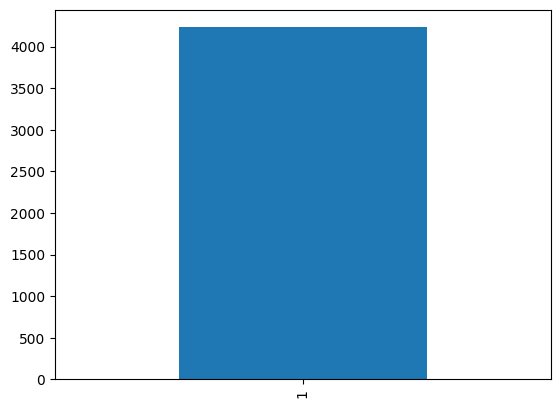

In [27]:
datasBBAB.shape
# find different number of staff used for each flight
# datasBBAB.groupby(['Flight Date','Flight No'])['staff'].nunique() 
# datasBBAB.staff.nunique
# find most frequent number of staff used for flights
# datasBBAB.groupby(['Flight Date','Flight No'])['staff'].nunique().value_counts()
# plot number of staff used for different standPosition:
# datasBBAB.['StandPosition'].nunique().value_counts().plot(kind='bar')
# plot number of staff used for different StandPositions:



# datasBBAB.groupby(['Flight Date','Flight No'])['staff'].nunique().value_counts().plot(kind='bar')

In [20]:
datasBBCD=datasBB[datasBB['StandPosition'].str.startswith(('C','D'),na=False)]
# count of all data where StandPosition startswith 'A' or 'B' excluding Nan values
# datasBB[datasBB['StandPosition'].str.startswith(('C','D'),na=False)].count()

In [23]:
datasBBCD.shape
datasBBCD.groupby(['Flight Date','Flight No'])['staff'].nunique().value_counts()

1    374
0    125
Name: staff, dtype: int64

In [12]:
datasBB[datasBB['StandPosition'].str.startswith(('E','F'),na=False)]
# count of all data where StandPosition startswith 'A' or 'B' excluding Nan values
datasBB[datasBB['StandPosition'].str.startswith(('E','F'),na=False)].count()

Flight No             2013
Flight Date           2013
In-bound Time         2013
Trip Number           2013
ULD Number            2013
Pickup Time            957
Dropoff Time           805
DroppoffTime Final     859
Total ULDs            2013
Total Time             859
Orientation           1489
ST                    1489
Inbound-Time          1489
staff                 1489
StandPosition         2013
dtype: int64